

# **Group 2**:
 1. Ivy Kemunto
 2. Loise Hellen
 3. Aisha Mbarak
 4. Daniel Ndirangu
 5. Judith Waguma
 6. Stanley Weru
 7. Bernard Mucui(Team Leader)




# SyriaTel Customer Churning Analysis 

![OpenAI Logo](https://www.esriuk.com/content/dam/esrisites/en-us/industries/2022/telecommunications/assets/overview/industry-telecom-overview-two-thirds.jpg)

# Business Understanding

In the highly competitive telecommunications sector, customer attrition, or churn, has emerged as a significant concern for businesses like SyriaTel. With a multitude of choices available to consumers and increasing expectations, retaining existing customers has become more critical than ever before. Churn has a dual impact, leading to immediate revenue loss and additional costs associated with acquiring new customers.

To address churn effectively, telecom businesses must recognize its underlying factors and predict it accurately. By analyzing historical customer data, companies gain valuable insights into patterns of customer behavior, preferences, and communication habits. Armed with this knowledge, businesses can proactively identify customers at risk of leaving and devise personalized retention strategies.

Taking a proactive approach to churn management allows companies to mitigate revenue loss while simultaneously enhancing customer satisfaction. This approach nurtures customer loyalty and drives overall business performance positively. It not only tackles immediate concerns but also invests in the long-term success and growth of the company. By adopting such an approach, telecom businesses can navigate the challenges posed by churn, optimize customer retention, and establish a competitive advantage in the market.

Stake holder: **SyriaTel**

The following business problems have been formulated for our analysis;

1. Create a precise binary classification model to accurately predict customer churn and effectively reduce customer attrition?

2. What patterns and insights can we uncover in customer behavior that would enable early identification of customers who are likely to churn, allowing us to implement proactive interventions?

3. How can we assist SyriaTel in optimizing retention strategies and resource allocation to minimize financial losses associated with customer churn, ultimately improving the company's bottom line and fostering customer loyalty?

# Data Understanding

The SyriaTel dataset from [Kaggle](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset) is composed of a comprehensive set of customer features, providing multifaceted information about customer usage behaviors, preferences, and interactions. 

* The dataset contains 3333 entries and 21 columns.
* The total memory usage of the dataset is approximately 524.2 KB.
* The columns represent various customer attributes, including state, account length, area code, phone number, international plan, voice mail plan, number of voice mail messages, call durations and charges for different time periods and international calls, customer service calls, and churn status.
* The dataset does not have any missing values, as indicated by the non-null counts.
* The data types of the columns include bool, float64, int64, and object.
* The bool column represents the churn status, indicating whether a customer discontinued the service (True) or not (False).
* The float64 columns represent numerical values for call durations and charges.
* The int64 columns represent numerical values for account length, area code, number of voice mail messages, call counts, and customer service calls.
* The object columns include state, phone number, international plan, and voice mail plan, which are categorical variables.


By understanding these features and their implications, we can conduct in-depth analyses and predictive modeling to tackle the issue of customer churn.

**Assumptions**:
* All of the data was captured at one point in time.
* The data represents a bill over a one month duration.
* Each row represents a unique phone number. (Confirmed in Data Preparation)
* Each phone number represents one account.
* The company is charging in dollars.
* Account length is in terms of months.


### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
# Loading the dataset
pd.set_option('display.max_columns',None )
df=pd.read_csv("bigml_59c28831336c6604c800002a.csv")

In [3]:
# Display top details of the dataset
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Display details of the bottom dataset
df.tail()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,400-4344,no,yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [5]:
# Checking the shape of the dataset
df.shape

(3333, 21)

In [6]:
# Checking the column names in the dataset
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [7]:
# Checking the dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

## Data Cleaning and Preparation

The dataset contains no null values. Categorical variables will be converted to strings from float and integer values. Each row represents a unique customer phone number with no duplicates or placeholders.

#### Checking for null values

In [8]:
# Checking for null values
df.isna().sum()/len(df)

state                     0.0
account length            0.0
area code                 0.0
phone number              0.0
international plan        0.0
voice mail plan           0.0
number vmail messages     0.0
total day minutes         0.0
total day calls           0.0
total day charge          0.0
total eve minutes         0.0
total eve calls           0.0
total eve charge          0.0
total night minutes       0.0
total night calls         0.0
total night charge        0.0
total intl minutes        0.0
total intl calls          0.0
total intl charge         0.0
customer service calls    0.0
churn                     0.0
dtype: float64

#### Checking for place holders

In [9]:
# Checking for place holders
columns = ['state','area code','international plan', 'voice mail plan', 'churn']  
unique_values = {}
for col in columns:
    unique_values[col] = df[col].unique()
unique_values

{'state': array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
        'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
        'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
        'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
        'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object),
 'area code': array([415, 408, 510], dtype=int64),
 'international plan': array(['no', 'yes'], dtype=object),
 'voice mail plan': array(['yes', 'no'], dtype=object),
 'churn': array([False,  True])}

No place-holders are in the state, area_code, international_plan, voice_mail_plan and churn columns

#### Checking for duplicate rows

In [10]:
# Checking duplicated rows
df.duplicated().sum()

0

In [11]:
# Checking for duplicate in phone number
duplicates_numbers = df.duplicated(subset ='phone number')
duplicates_numbers.unique()

array([False])

The phone number is a unique identifier in our dataset, there are no duplicates in our datasets.

#### Checking and converting data types 

In [12]:
# Checking data types of categorical variables
columns = ['state', 'area code', 'international plan', 'voice mail plan']
column_data_types = df[columns].dtypes
print(column_data_types)

state                 object
area code              int64
international plan    object
voice mail plan       object
dtype: object


In [13]:
# Convert "State" column to categorical data type
df["area code"] = df["area code"].astype("str")
print(df["area code"].dtype)

object


In [14]:
# Convert churn, international plan and  voice mail plan column from boolean to integer
df["churn"] = df["churn"].astype(int)
print(df["churn"].dtype)

int32


#### Feature Engineering

In [15]:
# Creating new features; Total charges, Total talktime, Total Calls and Average call duration per customer
df["Total charge"] = df[['total day charge', 'total eve charge', 'total night charge', 'total intl charge']].sum(axis=1)
df["Total Talk time"] = df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].sum(axis=1)
df["Total calls"] = df[['total day calls', 'total eve calls', 'total night calls', 'total intl calls']].sum(axis=1)
df["Avg Call duration"]= df["Total Talk time"] / df["Total calls"]

In [16]:
# Creating day to night ratio per customer column
df["day_night_ratio"] = df["total day calls"]/df["total night calls"]
print(df["day_night_ratio"].describe())

count    3333.000000
mean        1.047618
std         0.323065
min         0.000000
25%         0.826923
50%         1.000000
75%         1.216867
max         3.939394
Name: day_night_ratio, dtype: float64


On average, there are slightly more calls during the day compared to the night.

In [17]:
# Creating a voice message to call ratio for each customer
df["voice_ms_call_ratio"] = df["number vmail messages"]/ df["Total calls"]
df["voice_ms_call_ratio"].describe()

count    3333.000000
mean        0.026910
std         0.045928
min         0.000000
25%         0.000000
50%         0.000000
75%         0.062670
max         0.188525
Name: voice_ms_call_ratio, dtype: float64

The average of the number of voicemail messages is approximately 0.026910; on average, a small proportion of calls result in voicemail messages.

In [18]:
# Creating columns for charges per call for night, day, evening and international calls per customer
df["charge_per_call_night"] = df["total night charge"] / df["total night minutes"]
df["charge_per_call_day"] = df["total day charge"] / df["total day minutes"]
df["charge_per_call_eve"]= df["total eve charge"] / df["total eve minutes"]
df["charge_per_call_intl"] = df["total intl charge"] / df["total intl minutes"]

In [19]:
# Summary statistics for the different charges per call
summary_stats = df[["charge_per_call_night", "charge_per_call_day", "charge_per_call_eve", "charge_per_call_intl"]].describe()
summary_stats

,charge_per_call_night,charge_per_call_day,charge_per_call_eve,charge_per_call_intl
count,3333.000000,3331.000000,3332.000000,3315.000000
mean,0.045000,0.170003,0.085001,0.270057
std,0.000017,0.000028,0.000016,0.000329
min,0.044828,0.169231,0.084936,0.268182
25%,0.044988,0.169989,0.084988,0.269811
50%,0.045000,0.170004,0.085000,0.270000
75%,0.045013,0.170017,0.085013,0.270297
max,0.045111,0.170513,0.085075,0.272727


* The average charges per call for **nighttime calls** is approximately 4.5 cents per minute
* The average charges per call for **daytime calls** is approximately 17 cents per minute
* The average charges per call for **evening calls** is approximately 8.5 cents per minute
* The average charges per call for **international calls** is approximately 27 cents per minute

#### Checking for outliers

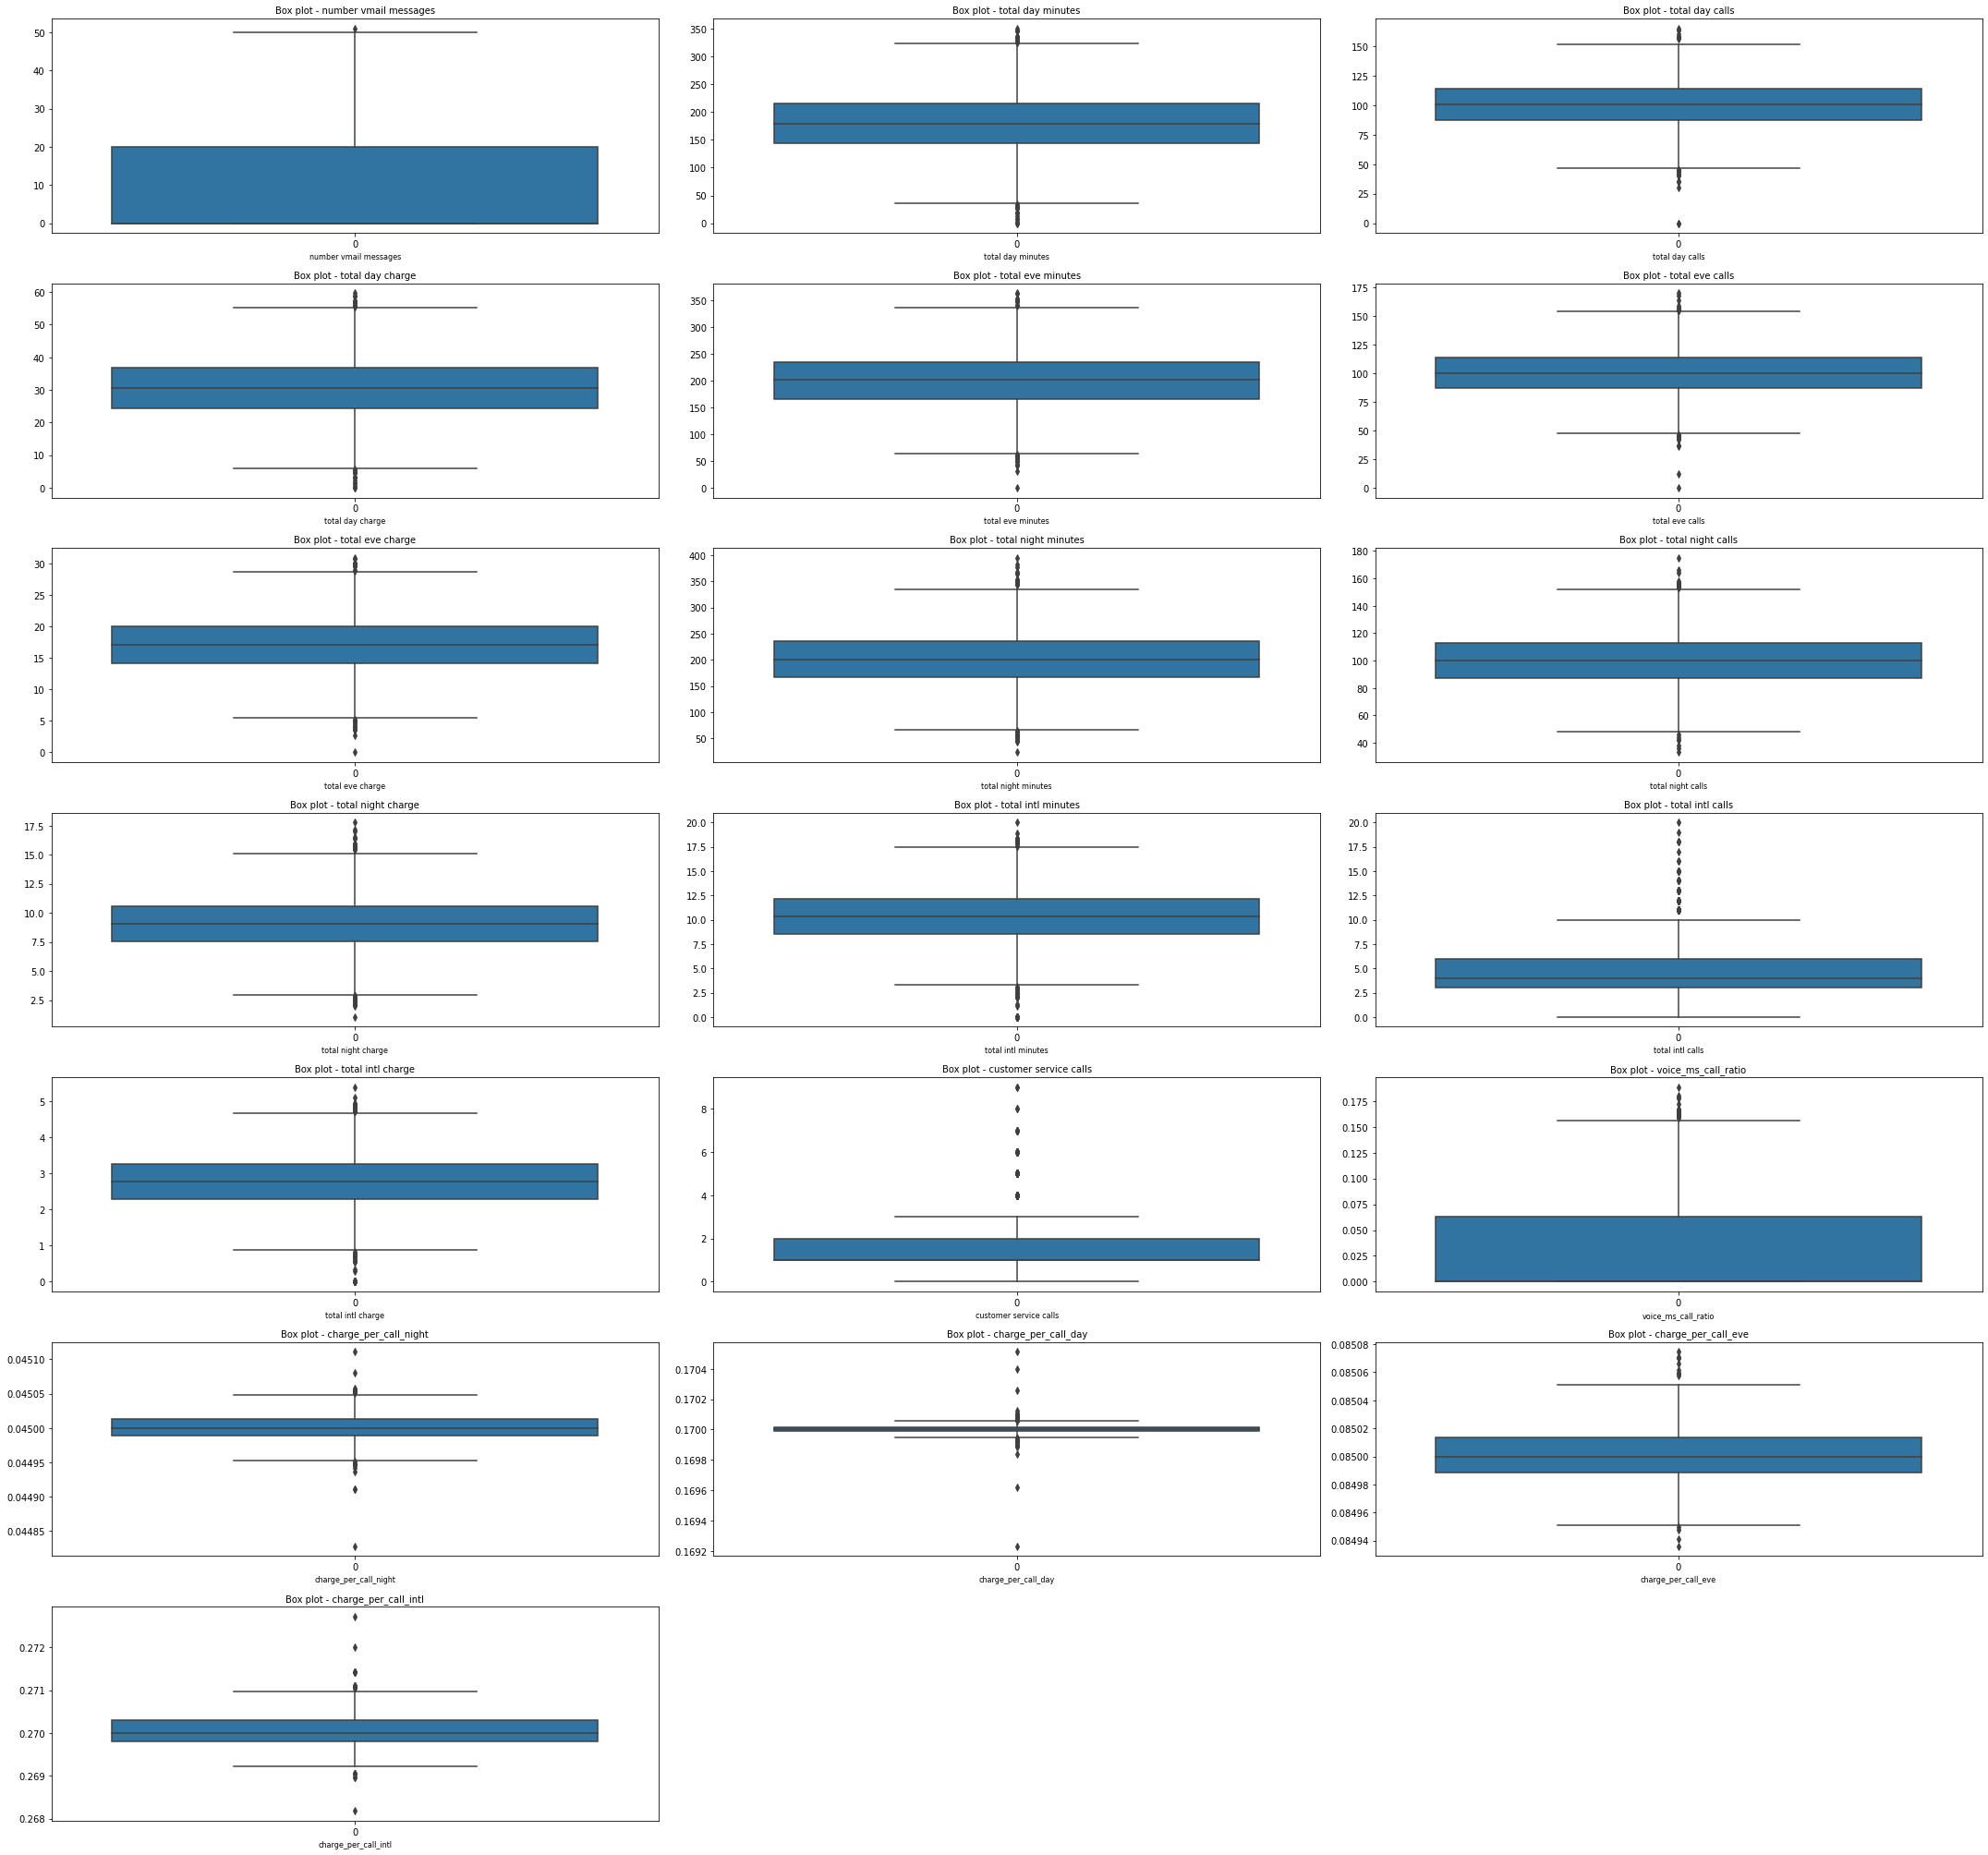

In [20]:
# Columns for our box plots
columns = ['number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
           'total eve minutes', 'total eve calls', 'total eve charge',
           'total night minutes', 'total night calls', 'total night charge',
           'total intl minutes', 'total intl calls', 'total intl charge',
           'customer service calls', 'voice_ms_call_ratio','charge_per_call_night', 
           'charge_per_call_day', 'charge_per_call_eve', 'charge_per_call_intl']

# Calculate the required number of rows and columns for subplots
num_rows = (len(columns) - 1) // 3 + 1
num_cols = min(len(columns), 3)

# Create the subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10*num_cols, 4*num_rows))

# Generate box plots for each column
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(data=df[column], ax=axes[row, col])
    axes[row, col].set_title(f'Box plot - {column}', fontsize=10)
    axes[row, col].set_xlabel(column, fontsize=8)

# Remove any empty subplots
if i < (num_rows * num_cols) - 1:
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

## Exploratory Data Analysis

### Univariate Analysis 

In [21]:
 df.describe(include="all")

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,Total charge,Total Talk time,Total calls,Avg Call duration,day_night_ratio,voice_ms_call_ratio,charge_per_call_night,charge_per_call_day,charge_per_call_eve,charge_per_call_intl
count,3333,3333.000000,3333,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3331.000000,3332.000000,3315.000000
unique,51,NaN,3,3333,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,WV,NaN,415,345-1243,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,106,NaN,1655,1,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,101.064806,NaN,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914,59.449754,591.864776,305.137114,1.964884,1.047618,0.026910,0.045000,0.170003,0.085001,0.270057
std,NaN,39.822106,NaN,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067,10.502261,89.954251,34.448164,0.376958,0.323065,0.045928,0.000017,0.000028,0.000016,0.000329
min,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,22.930000,284.300000,191.000000,0.798596,0.000000,0.000000,0.044828,0.169231,0.084936,0.268182
25%,NaN,74.000000,NaN,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000,52.380000,531.500000,282.000000,1.705187,0.826923,0.000000,0.044988,0.169989,0.084988,0.269811
50%,NaN,101.000000,NaN,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000,59.470000,593.600000,305.000000,1.939936,1.000000,0.000000,0.045000,0.170004,0.085000,0.270000
75%,NaN,127.000000,NaN,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000,66.480000,652.400000,328.000000,2.195963,1.216867,0.062670,0.045013,0.170017,0.085013,0.270297


**International Plan**: There are two unique values, "yes" and "no." The most frequent value is "no," appearing 3010 times.

**Voice Mail Plan**: There are two unique values, "yes" and "no." The most frequent value is "no," appearing 2411 times.

**Number of Voice Mail Messages**: The count of non-null voice mail messages ranges from 0 to 51. The mean is approximately 8.10, with a standard deviation of 13.69.

**Total Evening Minutes**: The total evening minutes range from 0 to 363.7, with a mean of approximately 200.87 and a standard deviation of 50.57.

**Total Evening Calls**: The total evening calls range from 0 to 170, with a mean of approximately 100.11 and a standard deviation of 19.92.

**Total Night Minutes**: The total night minutes range from 23.2 to 395, with a mean of approximately 200.87 and a standard deviation of 50.57.

**Total Night Calls**: The total night calls range from 33 to 175, with a mean of approximately 100.11 and a standard deviation of 19.57.

**Total International Minutes**: The total international minutes range from 0 to 20, with a mean of approximately 10.24 and a standard deviation of 2.79.

**Total International Calls**: The total international calls range from 0 to 20, with a mean of approximately 4.48 and a standard deviation of 2.46.

**Customer Service Calls**: The customer service calls range from 0 to 9, with a mean of approximately 1.56 and a standard deviation of 1.32.

**Churn**: This column does not have summary statistics as it represents the target variable indicating whether a customer churned or not.

#### Distribution of customers per state.

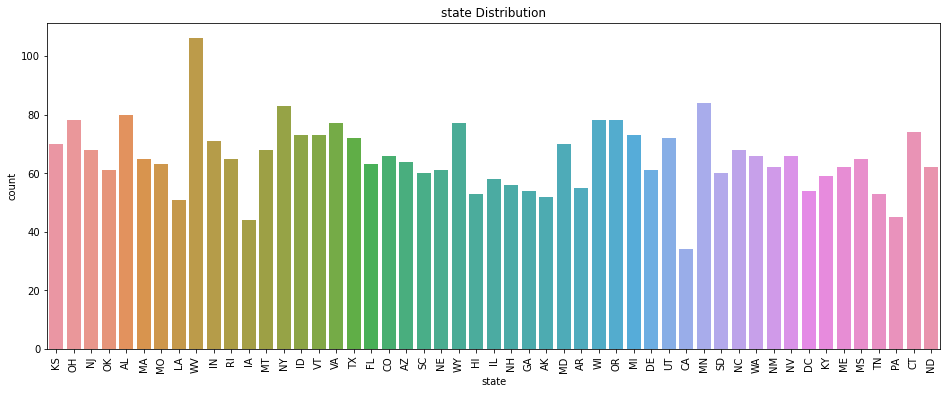

In [22]:
# Calculate value counts and plot bar plots for categorical variables
categorical_cols = ["state"]

for col in categorical_cols:
    df[col].value_counts()
    plt.figure(figsize=(16, 6))
    sns.countplot(x=col, data=df)
    plt.title(f"{col} Distribution")
    plt.xticks(rotation=90)
    plt.show()

* The state with the highest count is West Virginia (WV) with 106 occurrences, indicating it is the most frequent state in the dataset.
* Minnesota (MN) follows closely with 84 occurrences, making it the second most common state.
* New York (NY) comes next with 83 occurrences, showing a similar frequency to Minnesota.
* Alabama (AL), Wisconsin (WI), Oregon (OR), and Ohio (OH) all have 78 occurrences, placing them among the top states in terms of frequency.
* The state with the lowest count is California (CA) with only 34 occurrences, suggesting it is the least frequent state in the dataset.

#### Distirbution of numerical features.

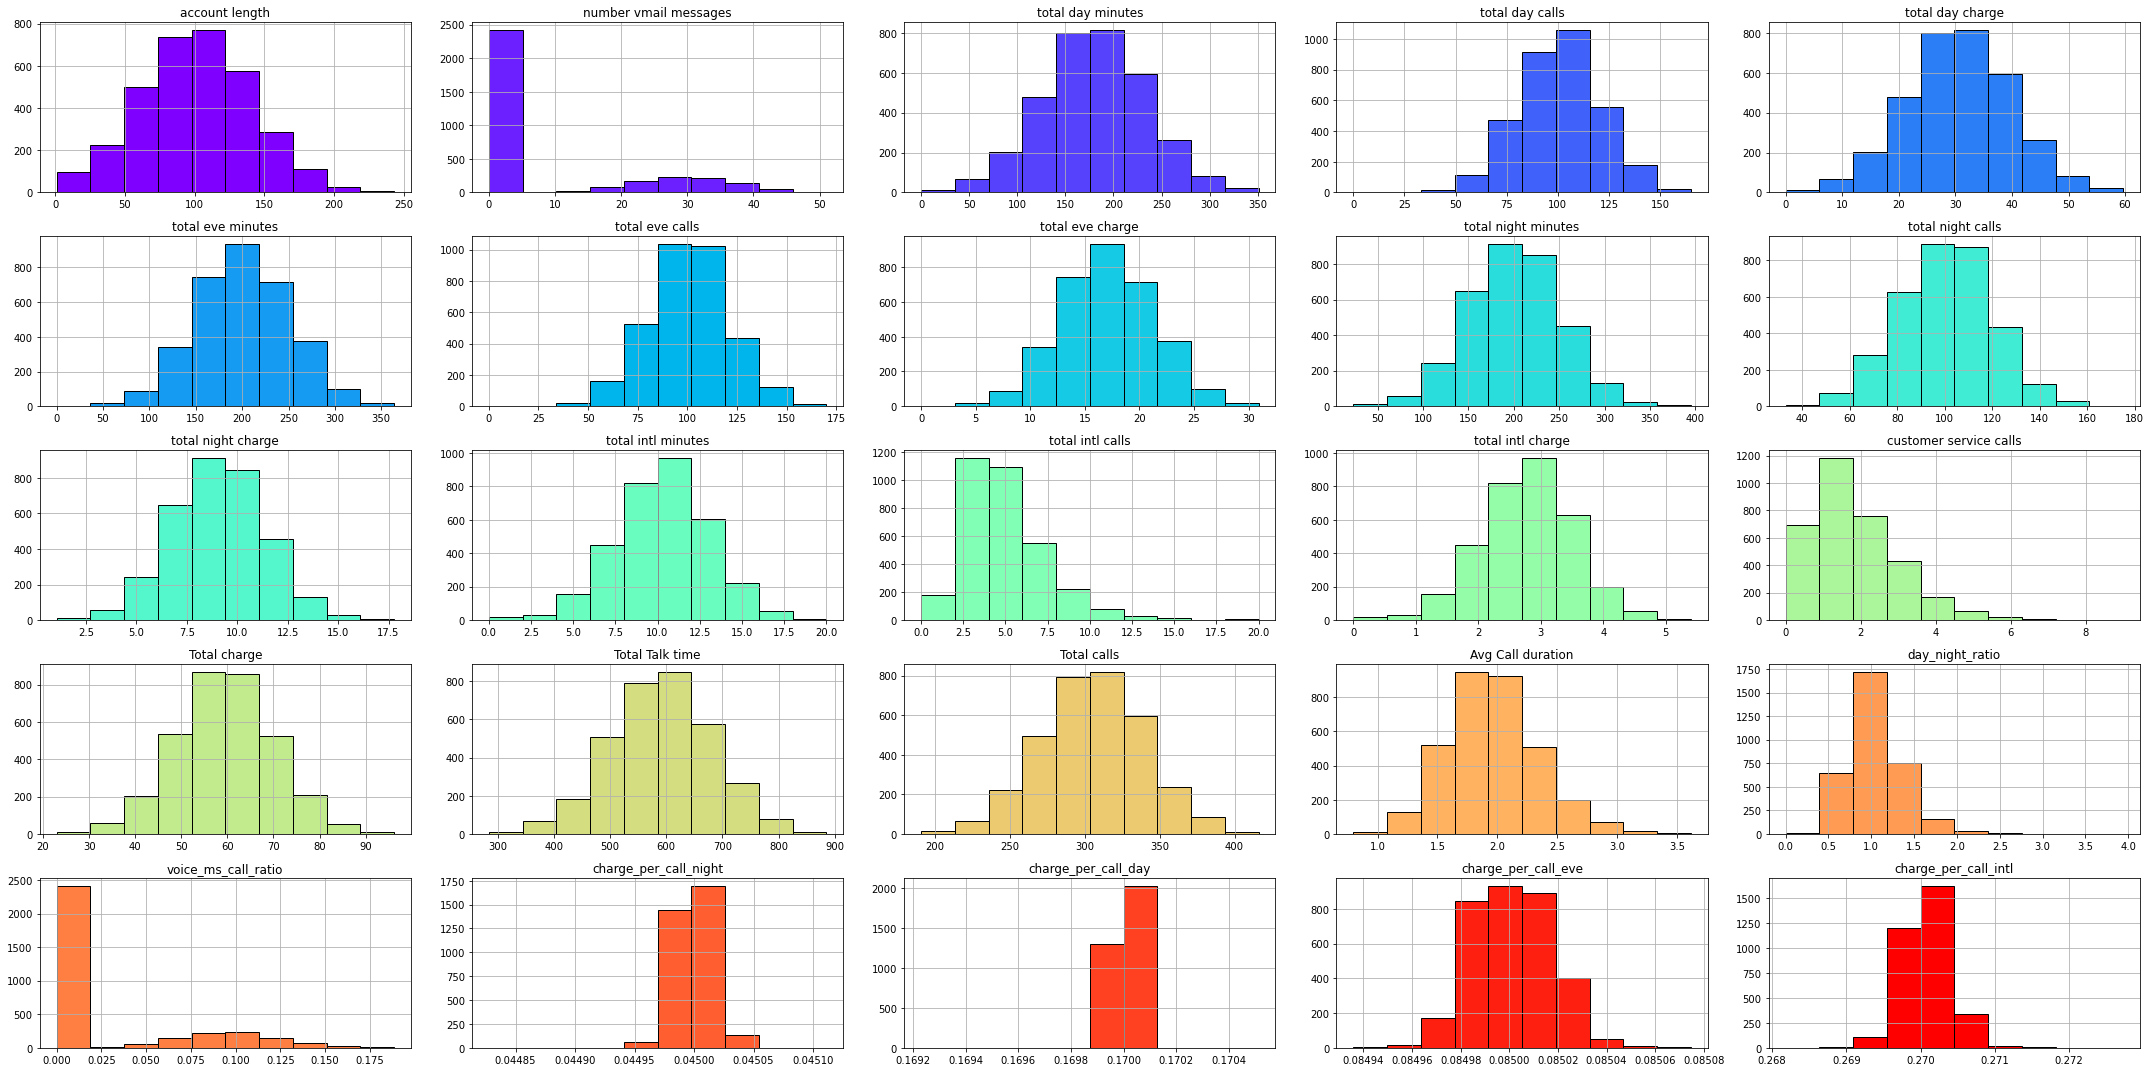

In [23]:
# Select only numerical columns and exclude specific ones
df_numerical = df.select_dtypes(include=[np.number])
columns_to_drop = ['phone number', 'churn']
df_numerical = df_numerical.drop(columns=[col for col in columns_to_drop if col in df_numerical.columns])

cols = df_numerical.columns
n = len(cols)
colors = cm.rainbow(np.linspace(0, 1, n))

for i in range(0, n, 25):
    remaining = min(n - i, 25)
    rows = math.ceil(remaining / 5)
    fig, axs = plt.subplots(rows, min(5, remaining), figsize=(30,15))
    axs = np.ravel(axs)

    for j in range(remaining):
        col = cols[i + j]
        ax = axs[j]
        df_numerical[col].hist(edgecolor='black', color=colors[(i + j) % len(colors)], ax=ax)
        ax.set_title(col)

    plt.tight_layout()
    plt.show()

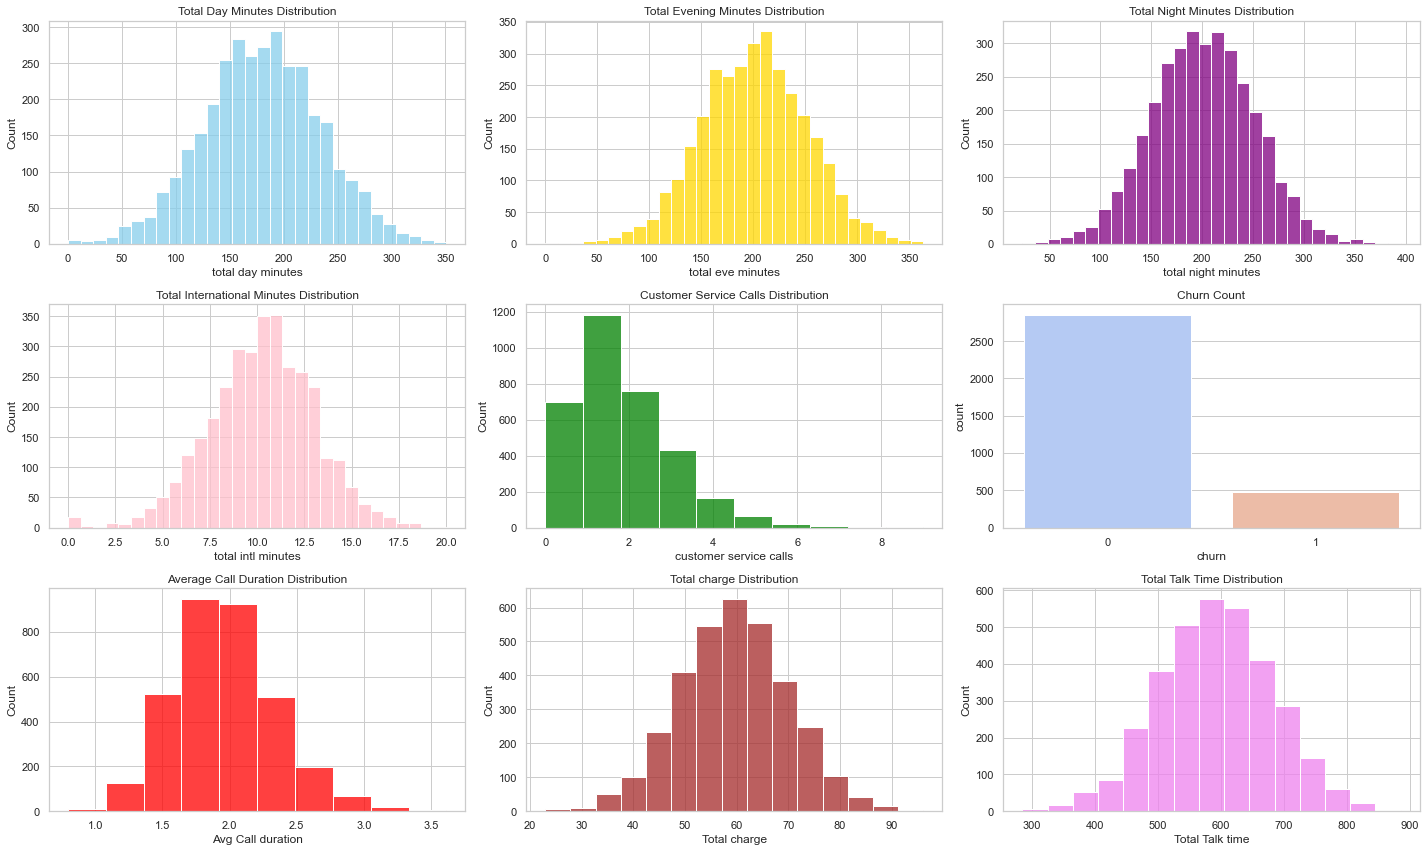

In [24]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure and axes
fig, ax = plt.subplots(3, 3, figsize=(20, 12))

# Plot distribution of total day, eve, night, intl minutes and customer service calls
sns.histplot(df['total day minutes'], kde=False, ax=ax[0, 0], color='skyblue', bins=30)
sns.histplot(df['total eve minutes'], kde=False, ax=ax[0, 1], color='gold', bins=30)
sns.histplot(df['total night minutes'], kde=False, ax=ax[0, 2], color='purple', bins=30)
sns.histplot(df['total intl minutes'], kde=False, ax=ax[1, 0], color='pink', bins=30)
sns.histplot(df['customer service calls'], kde=False, ax=ax[1, 1], color='green', bins=10)
sns.histplot(df['Avg Call duration'], kde=False, ax=ax[2, 0], color='red', bins=10)
sns.histplot(df['Total charge'], kde=False, ax=ax[2, 1], color='brown', bins=15)
sns.histplot(df['Total Talk time'], kde=False, ax=ax[2, 2], color='violet', bins=15)

# Plot churn count
sns.countplot(x='churn', data=df, ax=ax[1, 2], palette='coolwarm')

# Set plot titles
ax[0, 0].set_title('Total Day Minutes Distribution')
ax[0, 1].set_title('Total Evening Minutes Distribution')
ax[0, 2].set_title('Total Night Minutes Distribution')
ax[1, 0].set_title('Total International Minutes Distribution')
ax[1, 1].set_title('Customer Service Calls Distribution')
ax[2, 0].set_title('Average Call Duration Distribution')
ax[2, 1].set_title('Total charge Distribution')
ax[2, 2].set_title('Total Talk Time Distribution')
ax[1, 2].set_title('Churn Count')

# Show the plot
plt.tight_layout()
plt.show()

From the visualizations of the distributions of some numerical variables and the churn count:
- The total day minutes seem to be normally distributed, with most customers having around 175 to 200 total day minutes.
- Similarly, the total evening minutes also appear to be normally distributed, with most customers having around 200 total evening minutes.
- The total night minutes also follow a similar distribution, with the majority of customers having around 200 total night minutes.
- The total international minutes seem to have a slightly left-skewed distribution.   Most customers have about 10 total international minutes.
- Most customers have made 1 or 2 customer service calls, while very few have made more than 4 calls.
- The majority of customers have not churned (indicated by False), while a smaller number of customers have churned (indicated by True).


### Distribution of Categorical variables. 

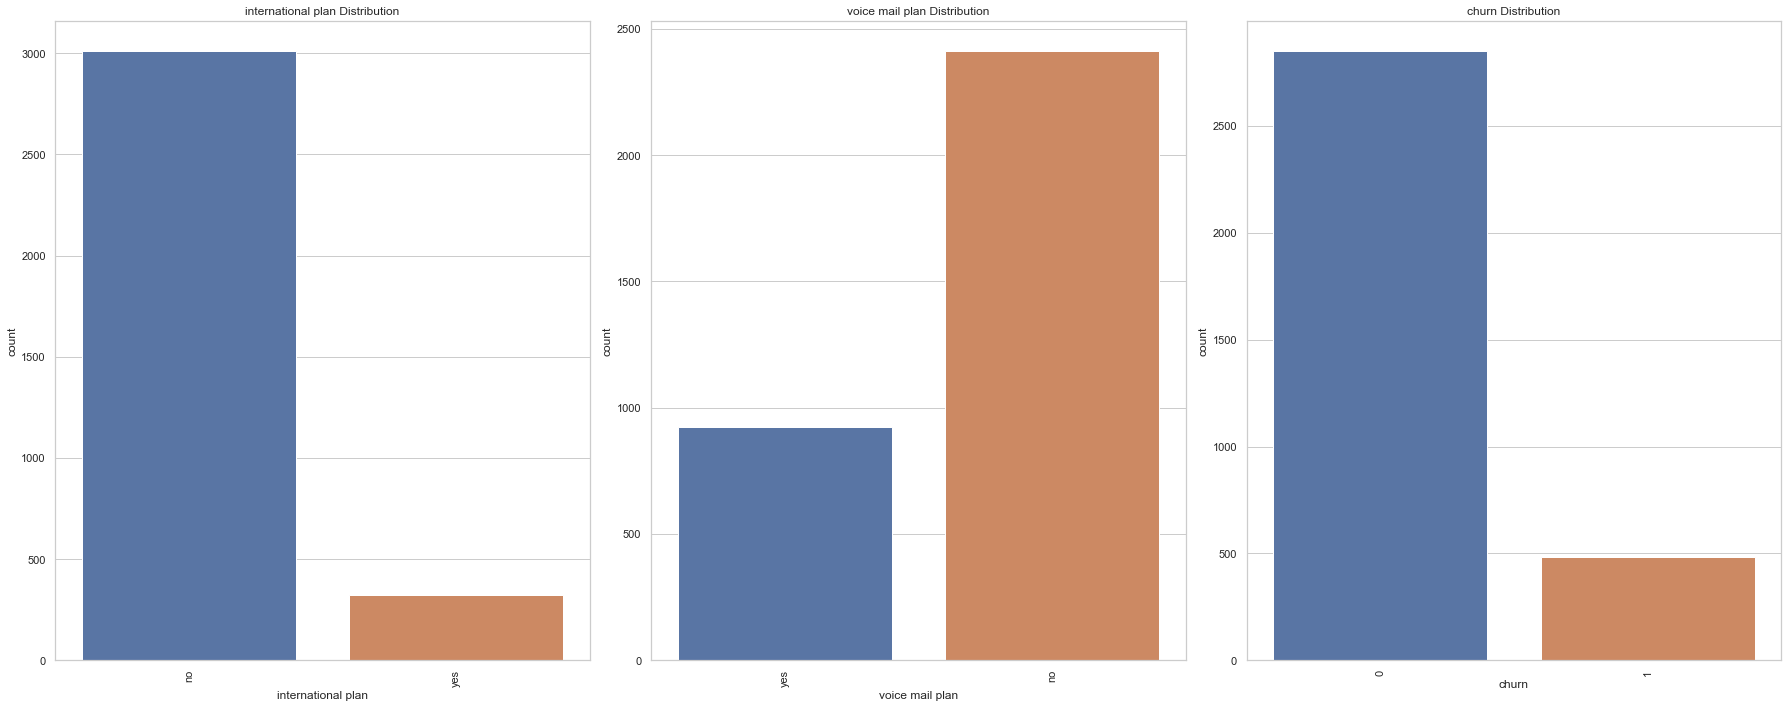

In [25]:

# Set up the figure and axes for subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))

# Flatten the axes array to simplify indexing
axs = axs.flatten()

# Calculate value counts and plot bar plots for categorical variables
categorical_cols = ["international plan", "voice mail plan", "churn"]

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, data=df, ax=axs[i])
    axs[i].set_title(f"{col} Distribution")
    axs[i].tick_params(axis='x', rotation=90)

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

* The data indicates that the majority of observations, approximately 85.5%, represent customers who did not churn. A smaller subset, comprising approximately 14.5% of the observations, represents customers who churned. These percentages highlight the imbalance in churn behavior, with a significant majority of customers demonstrating loyalty by not churning.
* The majority of customers, approximately 73% (2411 occurrences), do not have a voice mail plan.A subset of customers, approximately 27% (922 occurrences), have opted for a voice mail plan.
* The majority of customers, accounting for 3010 occurrences, do not have an international plan. Conversely, there is a smaller subset of 323 customers who have opted for an international plan.

### Bivariate Analysis

Distribution of churn for each state.

<AxesSubplot:xlabel='state'>

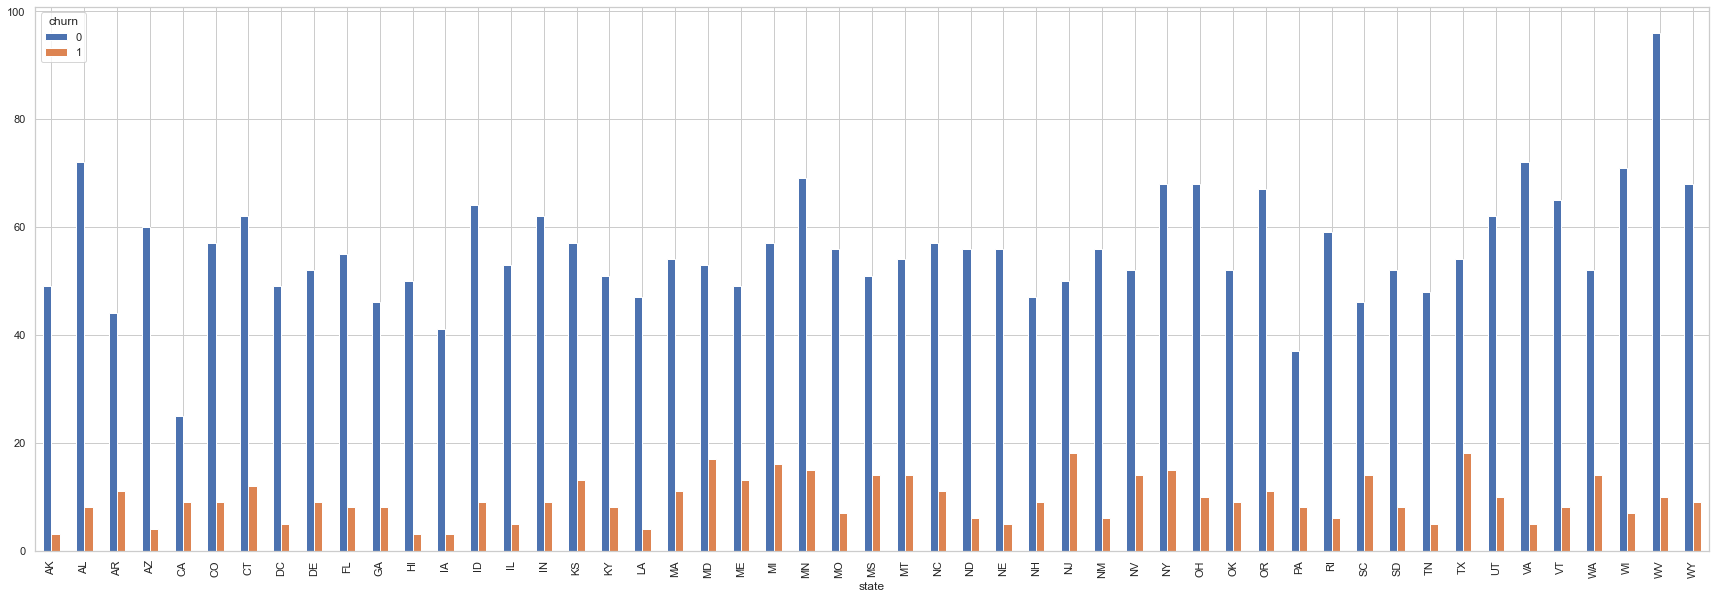

In [26]:
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=False, figsize=(30,10))

The plot above shows the distribution of churn for each state.
- Some states have relatively higher churn rates like WV, VT, NY, OH with a significant number of churned customers (churn 1) while other states have lower churn rates like AR, AZ, CA, CO with a higher count of customers who did not churn (churn 0)

#### Churn by Categorical Features

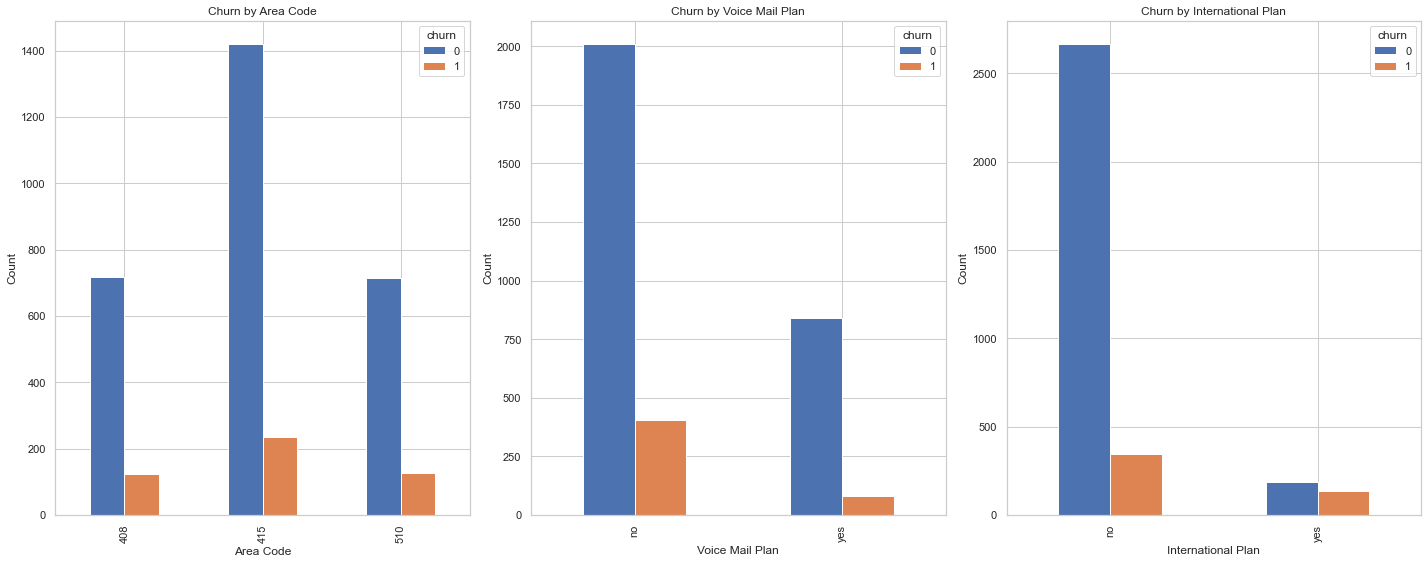

In [27]:
# Set up the figure and axes for subplots
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

# Group by "area code" and "churn", then unstack and plot
df.groupby(["area code", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[0])
axs[0].set_title('Churn by Area Code')
axs[0].set_xlabel('Area Code')
axs[0].set_ylabel('Count')

# Group by "voice mail plan" and "churn", then unstack and plot
df.groupby(["voice mail plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[1])
axs[1].set_title('Churn by Voice Mail Plan')
axs[1].set_xlabel('Voice Mail Plan')
axs[1].set_ylabel('Count')

# Group by "international plan" and "churn", then unstack and plot
df.groupby(["international plan", "churn"]).size().unstack().plot(kind='bar', stacked=False, ax=axs[2])
axs[2].set_title('Churn by International Plan')
axs[2].set_xlabel('International Plan')
axs[2].set_ylabel('Count')

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

* Churn rates vary between the different area codes, with area code 415 having the highest churn rate and area code 408 having the lowest churn rate
* Customers without a voice mail plan had a higher churn rate compared to customers with a voice mail plan
* Customers without an international plan had a higher churn rate compared to customers with an international plan

#### Churn by numerical features.

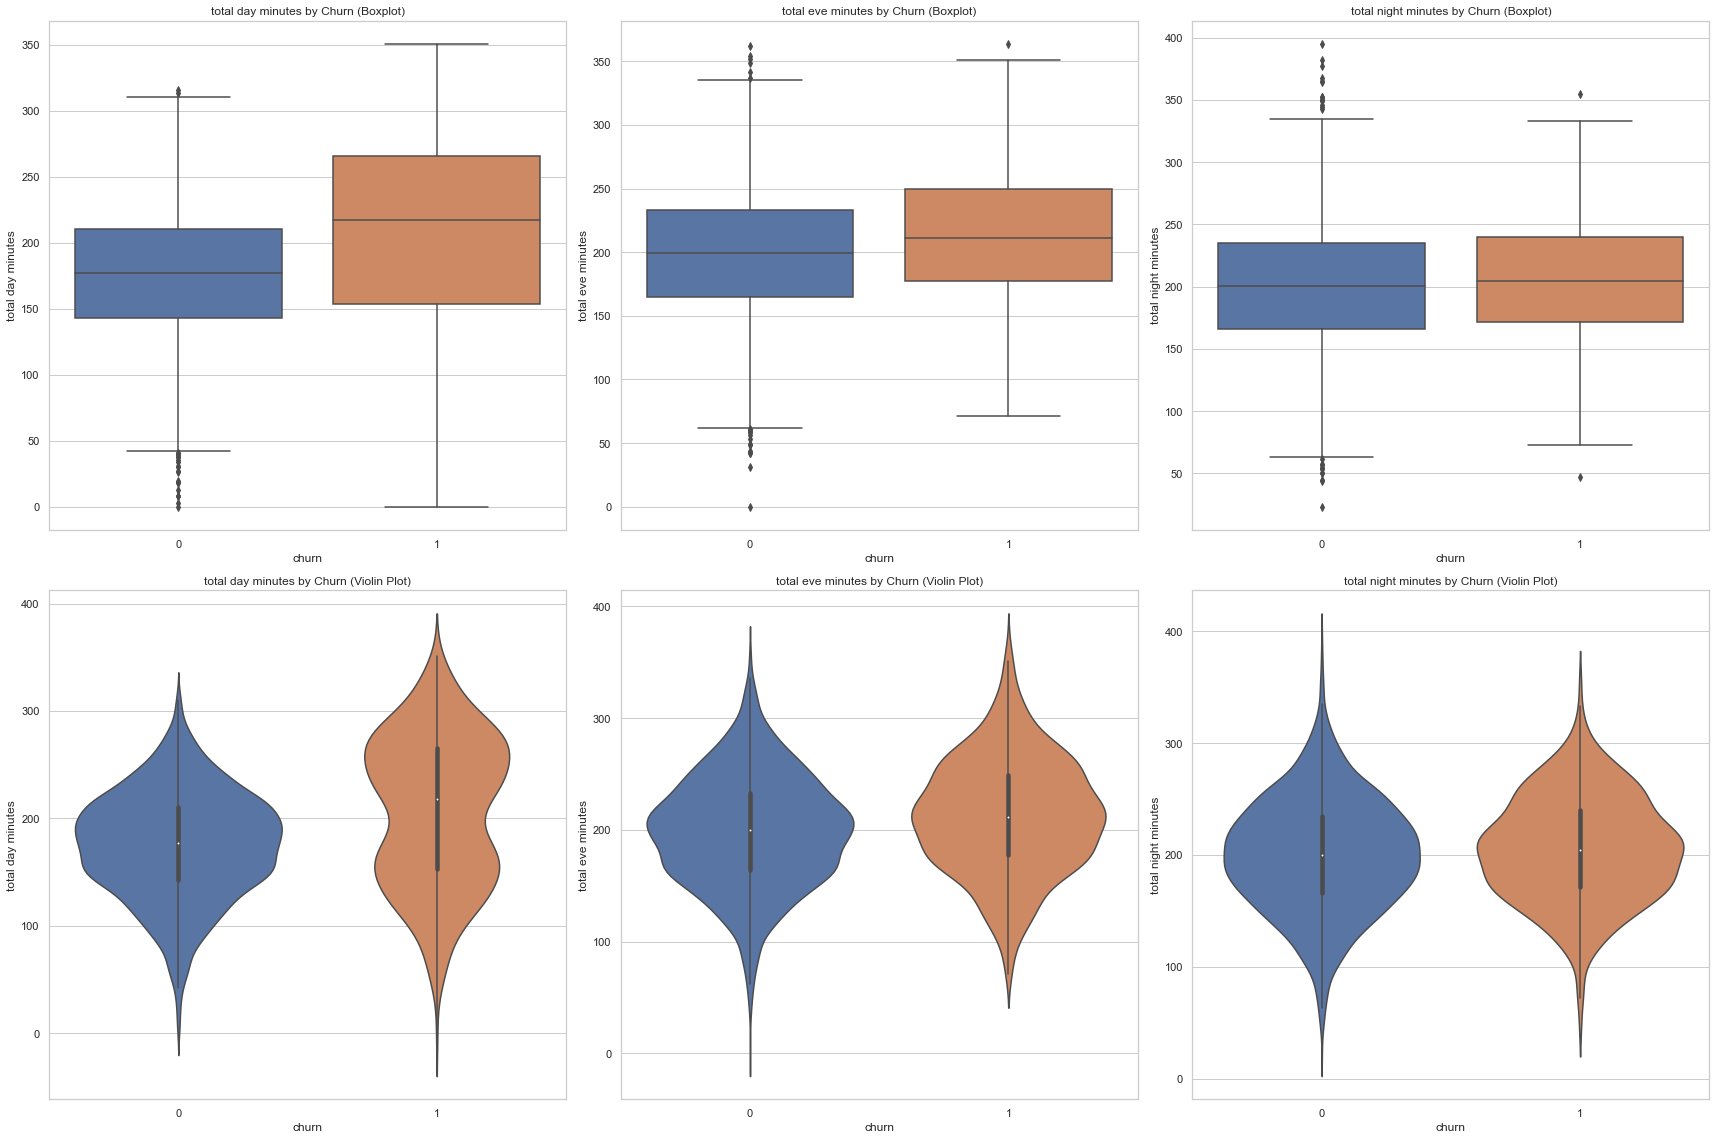

In [28]:
# Set up the figure and axes for subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(24, 16))

# List of numerical columns
numerical_cols = ["total day minutes", "total eve minutes", "total night minutes"]

# Loop over numerical columns and plot boxplots and violin plots
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="churn", y=col, data=df, ax=axs[0, i])
    axs[0, i].set_title(f"{col} by Churn (Boxplot)")
    
    sns.violinplot(x="churn", y=col, data=df, ax=axs[1, i])
    axs[1, i].set_title(f"{col} by Churn (Violin Plot)")

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

From the plots, you can observe the following:

- For "total day minutes", "total eve minutes", and "total night minutes", the distribution of minutes seems to be slightly higher for churned customers than for retained customers. This is especially noticeable for "total day minutes".
- The violin plots show similar patterns, with the density of churned customers appearing higher at larger values of minutes for each of the three features.

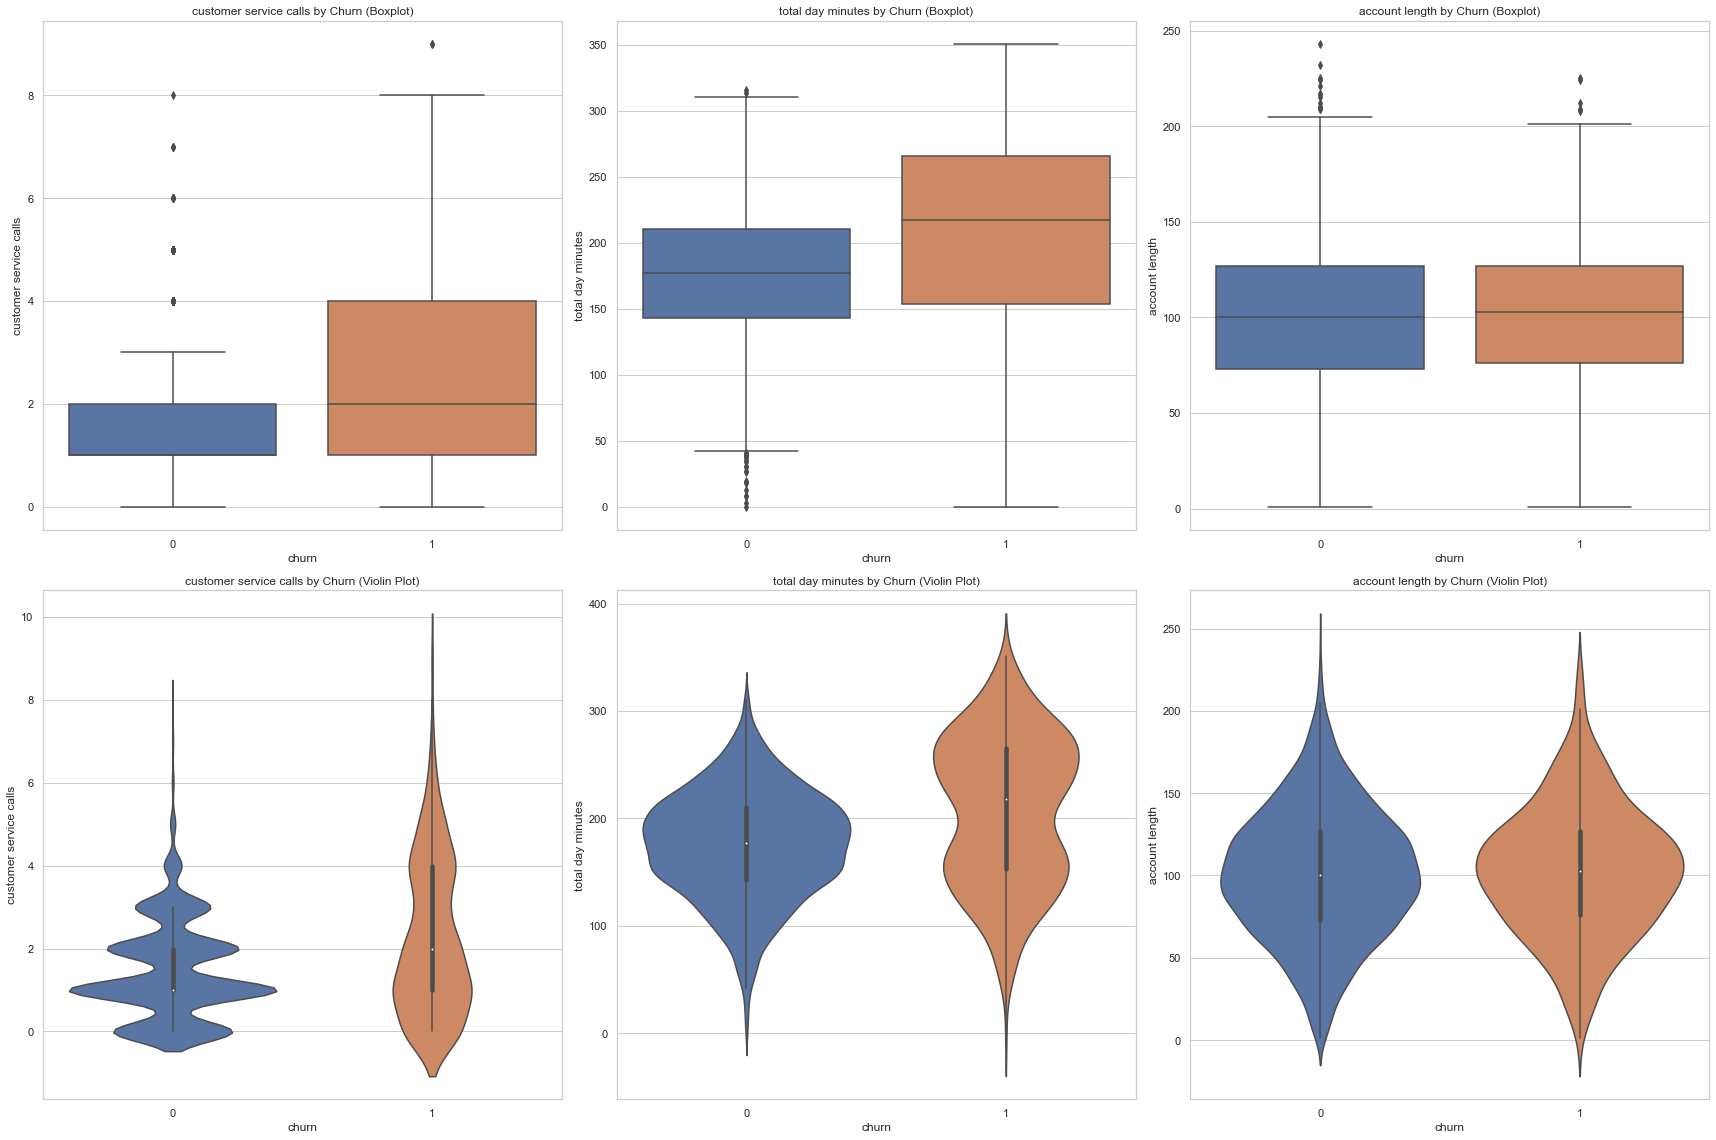

In [29]:
# Set up the figure and axes for subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(24, 16))

# List of numerical columns
numerical_cols = ["customer service calls", "total day minutes", "account length"]

# Loop over numerical columns and plot boxplots and violin plots
for i, col in enumerate(numerical_cols):
    sns.boxplot(x="churn", y=col, data=df, ax=axs[0, i])
    axs[0, i].set_title(f"{col} by Churn (Boxplot)")
    
    sns.violinplot(x="churn", y=col, data=df, ax=axs[1, i])
    axs[1, i].set_title(f"{col} by Churn (Violin Plot)")

# Adjust the layout and spacing
plt.tight_layout()
plt.show()

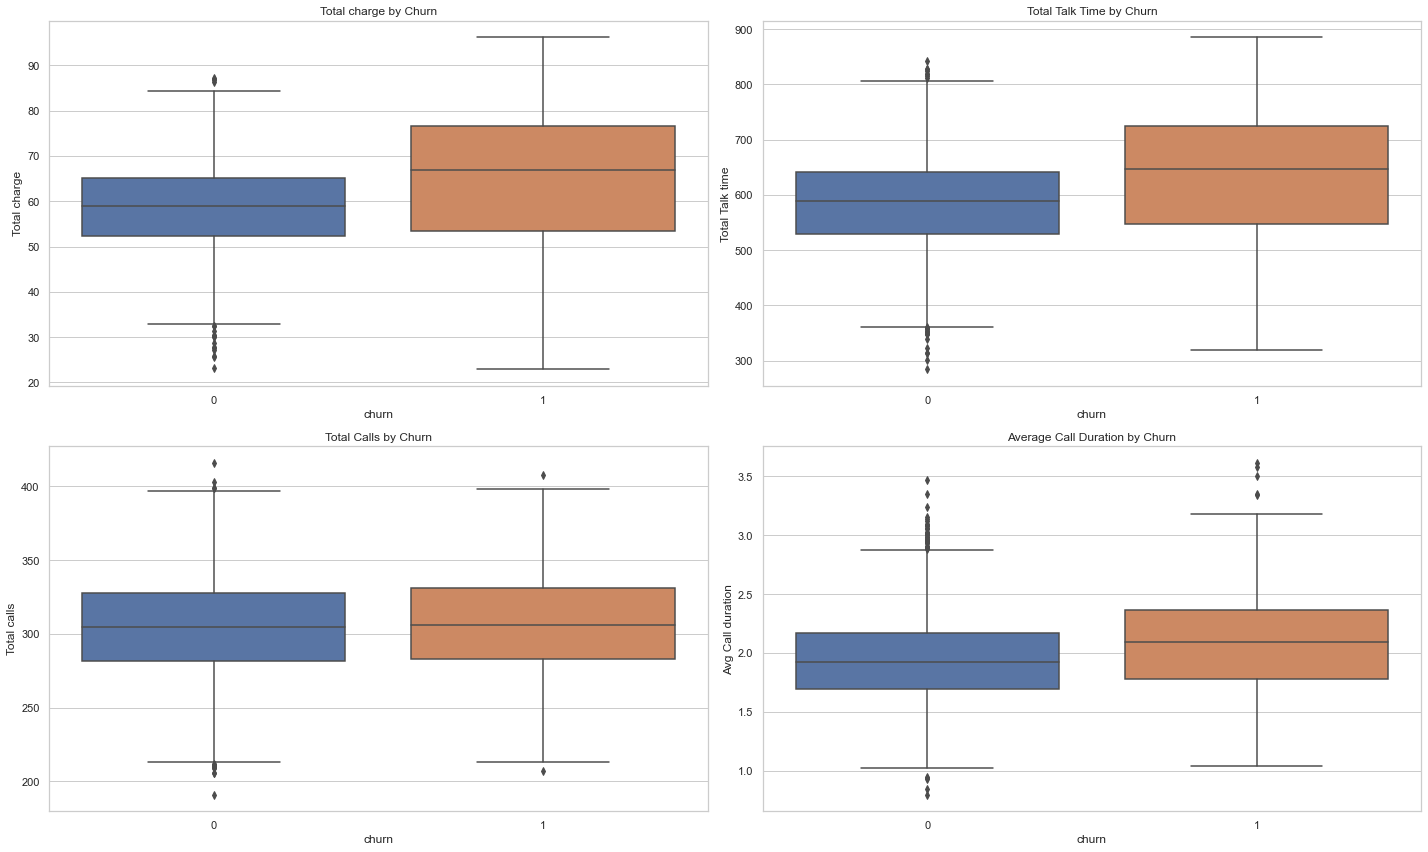

In [30]:
# Set up the figure and axes for subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

# Plot distribution of Customer expenditure, Total Talk time, Total calls and Avg Call duration by churn
sns.boxplot(x="churn", y="Total charge", data=df, ax=axs[0, 0])
sns.boxplot(x="churn", y="Total Talk time", data=df, ax=axs[0, 1])
sns.boxplot(x="churn", y="Total calls", data=df, ax=axs[1, 0])
sns.boxplot(x="churn", y="Avg Call duration", data=df, ax=axs[1, 1])

# Set plot titles
axs[0, 0].set_title('Total charge by Churn')
axs[0, 1].set_title('Total Talk Time by Churn')
axs[1, 0].set_title('Total Calls by Churn')
axs[1, 1].set_title('Average Call Duration by Churn')

# Show the plot
plt.tight_layout()
plt.show()

## Data preprocessing

### Checking highly correlated features

In [31]:
## Defining a function to check highly correlated features
def check_multicollinearity(df, threshold=0.8):
    corr_matrix = df.select_dtypes(include=np.number).corr().abs()
    correlated_pairs = set()
    for col in corr_matrix:
        correlated_cols = corr_matrix.index[corr_matrix[col] > threshold]
        correlated_pairs.update([(min(col, correlated_col), max(col, correlated_col)) for correlated_col in correlated_cols if col != correlated_col])
    for pair in correlated_pairs:
        print(f"{pair[0]} --- {pair[1]}")
    return set(df.columns) & set(col for pair in correlated_pairs for col in pair)

# Call the function to check multicollinearity
multicollinear_features = check_multicollinearity(df)

total night charge --- total night minutes
total eve charge --- total eve minutes
Total charge --- total day minutes
number vmail messages --- voice_ms_call_ratio
Total Talk time --- Total charge
Total charge --- total day charge
total intl charge --- total intl minutes
total day charge --- total day minutes


In [32]:
# Drop some columns in order to deal with multicollinearity
features= ['number vmail messages', 'total day minutes','total eve minutes','total night minutes','total day charge', 'total eve charge',
       'total night charge', 'total intl minutes']
df =df.drop(features,axis=1)
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,total day calls,total eve calls,total night calls,total intl calls,total intl charge,customer service calls,churn,Total charge,Total Talk time,Total calls,Avg Call duration,day_night_ratio,voice_ms_call_ratio,charge_per_call_night,charge_per_call_day,charge_per_call_eve,charge_per_call_intl
0,KS,128,415,382-4657,no,yes,110,99,91,3,2.70,1,0,75.56,717.2,303,2.366997,1.208791,0.082508,0.044994,0.170011,0.085005,0.270000
1,OH,107,415,371-7191,no,yes,123,103,103,3,3.70,1,0,59.24,625.2,332,1.883133,1.194175,0.078313,0.045008,0.169988,0.085013,0.270073
2,NJ,137,415,358-1921,no,no,114,110,104,5,3.29,0,0,62.29,539.4,333,1.619820,1.096154,0.000000,0.045018,0.170008,0.084983,0.269672
3,OH,84,408,375-9999,yes,no,71,88,89,7,1.78,2,0,66.80,564.8,255,2.214902,0.797753,0.000000,0.044997,0.170007,0.084976,0.269697
4,OK,75,415,330-6626,yes,no,113,122,121,3,2.73,3,0,52.09,512.0,359,1.426184,0.933884,0.000000,0.044997,0.170006,0.085030,0.270297


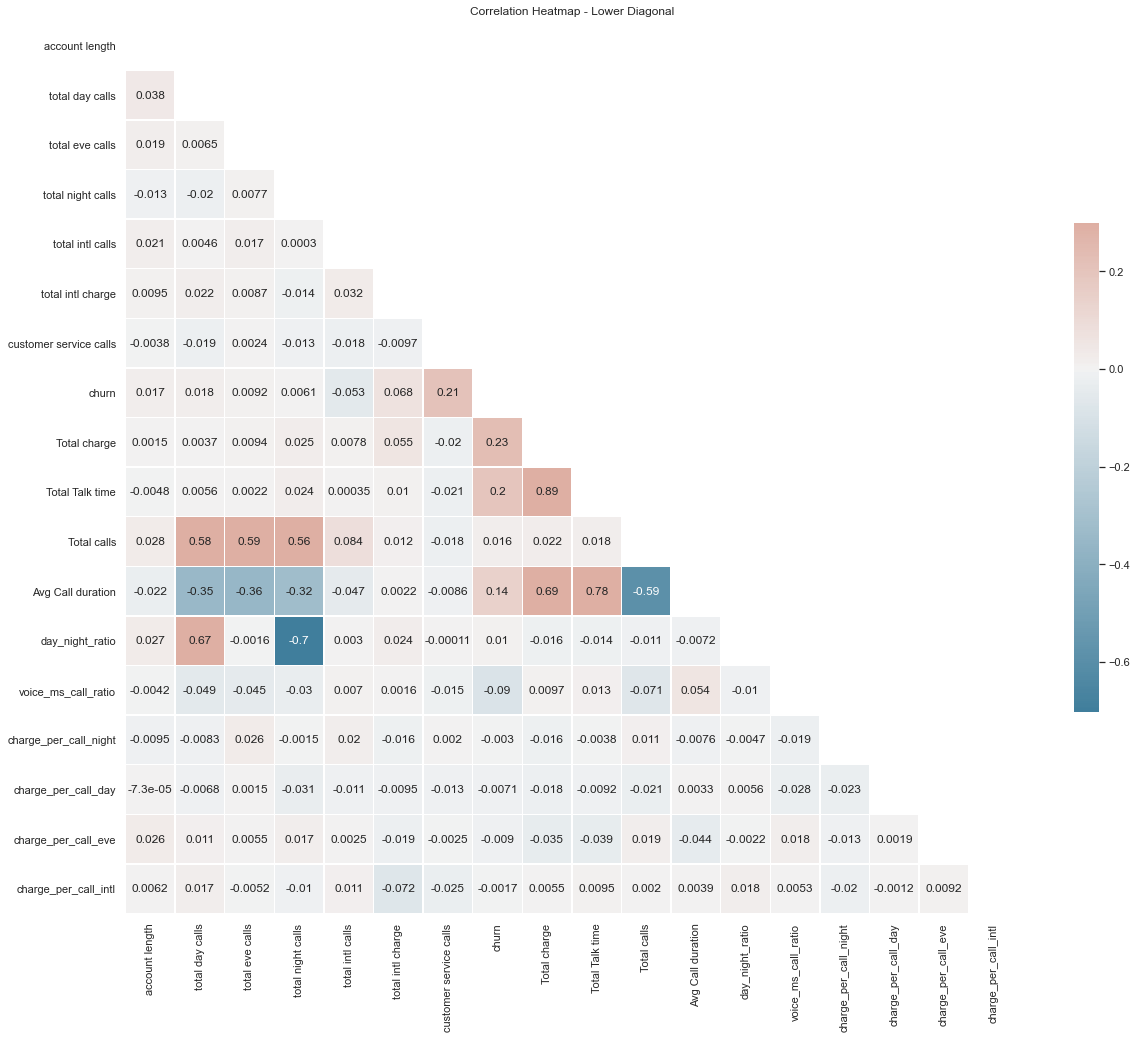

In [33]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(20, 18))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Correlation Heatmap - Lower Diagonal")
plt.show()

* Blue shades: Represent negative correlations, with darker blue indicating stronger negative correlation.
* White: Represents zero correlation.
* Red shades: Represent positive correlations, with darker red indicating stronger positive correlation.
In this color scheme, the strongest negative correlations are represented by the darkest blue, and the strongest positive correlations are represented by the darkest red. The center (white) represents variables with no correlation (correlation coefficient close to zero).

### Scaling and encoding

In [34]:
#Dropping phone number since it doesnot add any value to modelling since all  values are unique
df = df.drop('phone number', axis=1)
df.dropna(inplace=True)

# Define numerical and categorical features
num_features = ['account length','customer service calls','Total charge',
       'Total Talk time', 'Total calls', 'day_night_ratio', 'voice_ms_call_ratio', 'charge_per_call_night', 'charge_per_call_day',
       'charge_per_call_eve']
cat_features = ['state', 'area code', 'international plan', 'voice mail plan']

# Scale numerical features
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])

# One-hot encode categorical features
df = pd.get_dummies(df, columns=cat_features, drop_first=True)

## Modelling


### Splitting data

In [35]:
# Checking for the percentage of Churners and non-churners.
df.churn.value_counts(normalize=True)*100

0    85.44686
1    14.55314
Name: churn, dtype: float64

There are approximately 85.45% are non-churners, while about 14.55% are churners.This class imbalance is handled using SMOTE (Synthetic Minority Over-sampling Technique ). 

In [36]:
# Define the target variable
y = df['churn']

# Drop the target variable from the feature set
X = df.drop(['churn'], axis=1)

# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2649, 71), (663, 71), (2649,), (663,))

In [37]:
# Create an instance of SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


### Baseline Model: Decision Tree 

In [38]:
# Create an instance of the decision tree classifier and fit the model on the training data
clf = DecisionTreeClassifier(random_state=42)

In [39]:
# Fit the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [40]:
# Make predictions on the testing data
y_pred = clf.predict(X_test)

#### Evaluating the model Before Tuning
Evaluate the model's performance using appropriate metrics such as accuracy, precision, recall, and F1-score

In [41]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the training data
    y_train_pred = model.predict(X_train)

    # Predict on the test data
    y_test_pred = model.predict(X_test)

    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Calculate precision
    train_precision = precision_score(y_train, y_train_pred)
    test_precision = precision_score(y_test, y_test_pred)

    # Calculate recall
    train_recall = recall_score(y_train, y_train_pred)
    test_recall = recall_score(y_test, y_test_pred)

    # Calculate F1-score
    train_f1 = f1_score(y_train, y_train_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    # Print evaluation metrics
    print("Training Data - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(
        train_accuracy, train_precision, train_recall, train_f1
    ))
    print("Test Data - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-score: {:.4f}".format(
        test_accuracy, test_precision, test_recall, test_f1
    ))

In [42]:
# Model evaluation
evaluate_model(clf, X_train, y_train, X_test, y_test)

Training Data - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Test Data - Accuracy: 0.9472, Precision: 0.8211, Recall: 0.8125, F1-score: 0.8168


#### Tuning the decision tree model
Determine the optimal hyperparameters for the decision tree model using techniques such as grid search.

In [43]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [5, 7,10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4,6],
}

# Create an instance of the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train_resampled,y_train_resampled)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [44]:
# Use the best model found for predictions
best_clf = grid_search.best_estimator_
y_predd = best_clf.predict(X_test)

#### Evaluating the decision tree model After tuning
Evaluate the model's performance using appropriate metrics such as accuracy, precision, recall, and F1-score.

In [45]:
# Evaluate tuned decision tree model
evaluate_model(best_clf, X_train_resampled, y_train_resampled, X_test, y_test)

Training Data - Accuracy: 0.9764, Precision: 0.9887, Recall: 0.9638, F1-score: 0.9761
Test Data - Accuracy: 0.9125, Precision: 0.6900, Recall: 0.7188, F1-score: 0.7041


Confusion Matrix:
[[536  31]
 [ 27  69]]


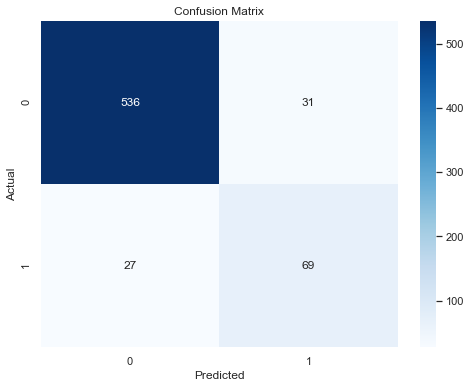

In [46]:
# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_predd)
print("Confusion Matrix:")
print(confusion_mat)

# Display confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

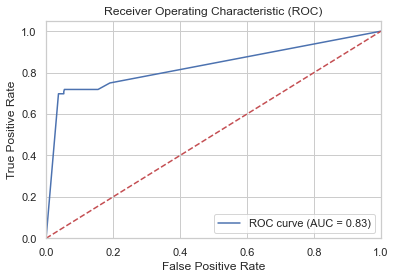

In [47]:
# Obtain predicted probabilities for the positive class
y_scores = best_clf.predict_proba(X_test)[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores, pos_label=1)


# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

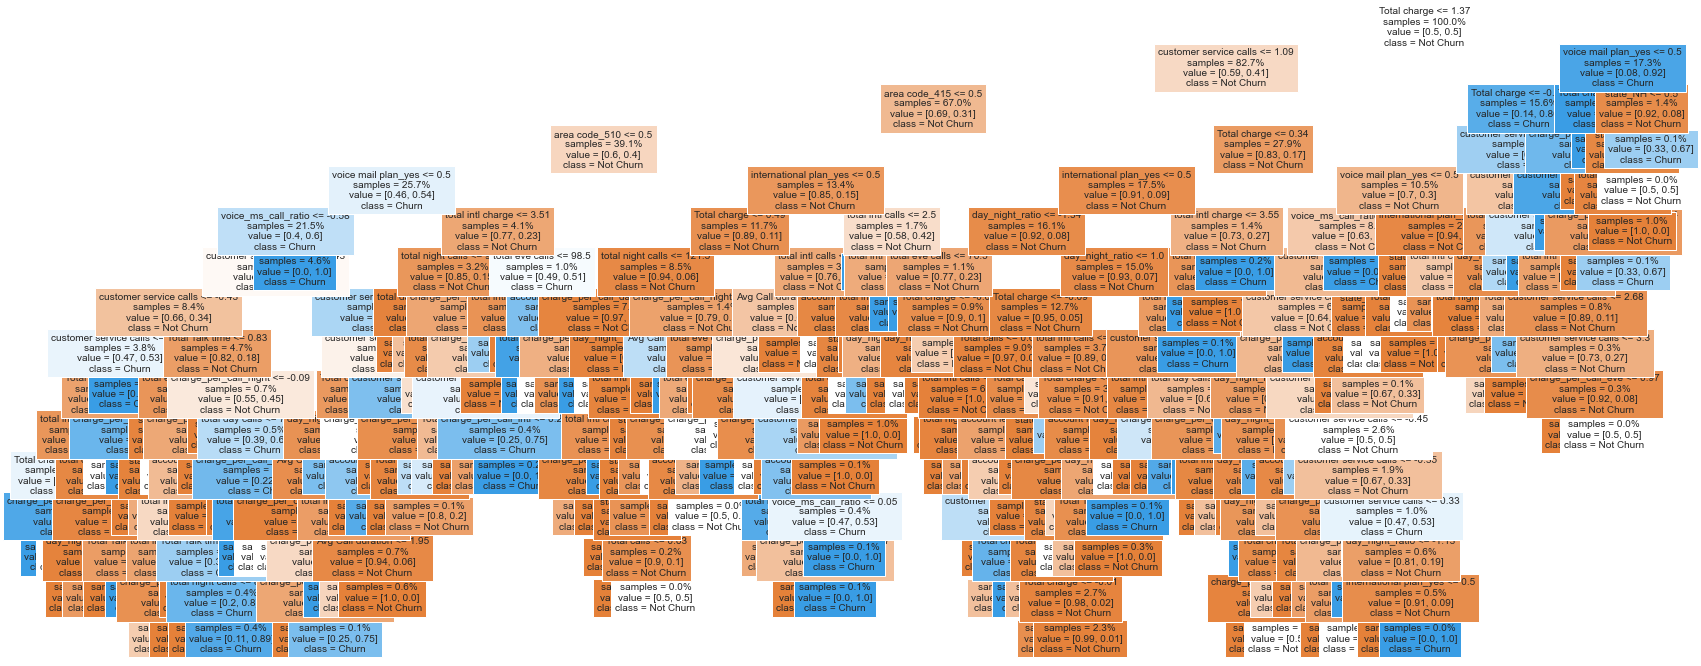

In [48]:
# Visualize the decision tree
plt.figure(figsize=(29, 12))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=['Not Churn', 'Churn'], fontsize=10, impurity=False, precision=2, proportion=True)
plt.show()

Before tuning, the Decision Tree model was able to correctly identify 81.25% of churn cases (recall) and of all instances it predicted as churn, 82.11% were correct (precision). The model was accurate in 94.72% of all predictions (accuracy) and had a balanced F1-score of 81.68% considering both precision and recall.

After hyperparameter tuning, the model's ability to correctly identify churn cases reduced to 71.88% (recall), and out of all predicted churn cases, 69.00% were correct (precision).
After hyperparameter tuning, the model's ability to correctly identify churn cases reduced to 71.88% (recall), and out of all predicted churn cases, 69.00% were correct (precision). The overall accuracy dropped to 91.25%. The F1-score, a measure of model's balance between precision and recall, also fell to 70.41%. The decrease in recall and F1-score suggests that the tuning might have led to a trade-off, improving precision at the expense of recall.

### Logistic Regression,Random Forest and Gradient Boost Models

In [49]:
# Model selection and hyperparameter tuning
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight="balanced"),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}
for model_name, model in models.items():
    # Train the model on the resampled data
    model.fit(X_train_resampled, y_train_resampled)

#### Model Performance Evaluation

In [50]:
def calculate_metrics(y_true, y_pred):
    """
    Calculate model performance metrics: accuracy, precision, recall, and F1-score.
    :param y_true: True labels.
    :param y_pred: Predicted labels.
    :return: Dictionary of metrics.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # Return as a dictionary
    return {"Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-score": f1}

# Dictionary to hold the results
results = {}

# For each model
for model_name, model in models.items():
    # Make predictions on the test set
    y_pred_test = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    # Calculate metrics
    metrics_test = calculate_metrics(y_test, y_pred_test)
    metrics_train = calculate_metrics(y_train, y_pred_train)
    
    # Store the results
    results[(model_name, 'Test')] = metrics_test
    results[(model_name, 'Train')] = metrics_train

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results).T

results_df

Accuracy  Precision    Recall  F1-score
Logistic Regression Test   0.766214   0.325444  0.572917  0.415094
                    Train  0.768969   0.326687  0.551813  0.410405
Random Forest       Test   0.904977   0.714286  0.572917  0.635838
                    Train  1.000000   1.000000  1.000000  1.000000
Gradient Boosting   Test   0.960784   0.897727  0.822917  0.858696
                    Train  0.975840   0.976331  0.854922  0.911602

### Model 2: Random Forest Tuning.

In [51]:
rf_param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]    # Minimum number of samples required to be at a leaf node
}



In [52]:
for model_name, model in models.items():
    if model_name == "Random Forest":
        # Create the GridSearchCV or RandomizedSearchCV instance
        grid_search = GridSearchCV(model, rf_param_grid, cv=5, n_jobs=-1)
        # Fit the model on the resampled data with hyperparameter search
        grid_search.fit(X_train_resampled, y_train_resampled)
        # Get the best hyperparameters
        best_params = grid_search.best_params_
        print(f"Best Hyperparameters for {model_name}: {best_params}")
        # Use the best hyperparameters for the final model
        model = grid_search.best_estimator_
    else:
        # For other models, you can follow similar steps with their respective hyperparameter grid.
        model.fit(X_train_resampled, y_train_resampled)

Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [53]:
# Create a new Random Forest model with the best hyperparameters
best_rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    class_weight="balanced"
)

# Now you can use this best_rf_model for further training and prediction.
best_rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(class_weight='balanced', n_estimators=150,
                       random_state=42)

#### Evaluation of tuned Random RandomForest

In [54]:
# Fit the RandomForestClassifier with the best hyperparameters on the training data
best_rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the training data
y_train_pred = best_rf_model.predict(X_train_resampled)

# Make predictions on the test data
y_test_pred = best_rf_model.predict(X_test)

# Evaluate the model on the training set
evaluate_model(best_rf_model, X_train, y_train, X_test, y_test)

Training Data - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Test Data - Accuracy: 0.9291, Precision: 1.0000, Recall: 0.5104, F1-score: 0.6759


The model achieved an accuracy of 92.9% on the test set. The F1-score is high, indicating a good balance between precision and recall. 

### Model 3: Logistic Regression Tuning.

In [55]:

# Define the hyperparameter grid for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],          # Inverse of regularization strength
    'penalty': ['l1', 'l2'],          # Regularization penalty ('l1' or 'l2')
    'solver': ['liblinear', 'saga']   # Optimization algorithm
}

# Create the Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

# Create the GridSearchCV instance for hyperparameter tuning
grid_search = GridSearchCV(logistic_regression, lr_param_grid, cv=5, n_jobs=-1)

# Fit the model on the resampled training data with hyperparameter search
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters for Logistic Regression:", best_params)

# Use the best hyperparameters for the final Logistic Regression model
best_logistic_regression_model = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred = best_logistic_regression_model.predict(X_test)

# Evaluate the model on the test set
evaluate_model(best_logistic_regression_model, X_train, y_train, X_test, y_test)

Best Hyperparameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Training Data - Accuracy: 0.8664, Precision: 0.6111, Recall: 0.2280, F1-score: 0.3321
Test Data - Accuracy: 0.8733, Precision: 0.6304, Recall: 0.3021, F1-score: 0.4085


The model achieved an accuracy of 87.3% on the test set, with better performance in predicting non-churners (class 0) compared to churners (class 1). Its performance is worse compared to the random forest model.

### Model 4: Tuning Gradient Boost Model

In [56]:
# Define the hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [50, 100, 150],            # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],         # Step size at each boosting iteration
    'max_depth': [3, 5, 7],                    # Maximum depth of the individual trees
    'subsample': [0.8, 0.9, 1.0],              # Fraction of samples used for fitting the trees
}

# Create the Gradient Boosting model
gradient_boosting = GradientBoostingClassifier(random_state=42)

# Create the GridSearchCV instance for hyperparameter tuning
grid_search_gb = GridSearchCV(gradient_boosting, gb_param_grid, cv=5, n_jobs=-1)

# Fit the model on the resampled training data with hyperparameter search
grid_search_gb.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params_gb = grid_search_gb.best_params_
print("Best Hyperparameters for Gradient Boosting:", best_params_gb)

# Use the best hyperparameters for the final Gradient Boosting model
best_gradient_boosting_model = grid_search_gb.best_estimator_

# Make predictions on the test set
y_test_pred_gb = best_gradient_boosting_model.predict(X_test)

# Evaluate the model on the test set
evaluate_model(best_gradient_boosting_model, X_train, y_train, X_test, y_test)


Best Hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 1.0}
Training Data - Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1-score: 1.0000
Test Data - Accuracy: 0.9713, Precision: 0.9873, Recall: 0.8125, F1-score: 0.8914



The Gradient Boosting model achieved an impressive 97.13% accuracy on the test set, demonstrating its excellent predictive capability for both churners and non-churners. With a high F1-score and precision, it effectively identifies churners (class 1) with a recall of 81.2% and precision of 97.1%, proving its effectiveness in predicting customer churn in this scenario.

### Model Evaluation

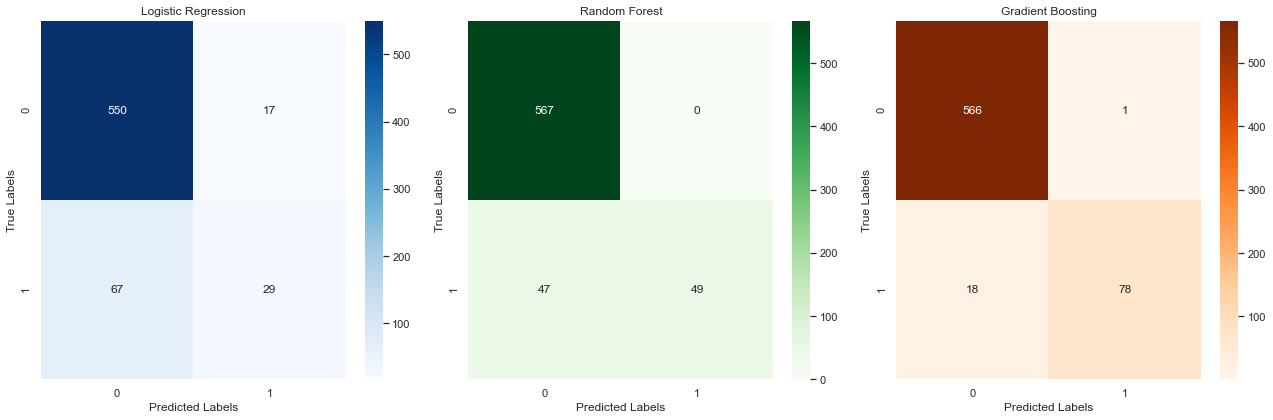

In [57]:
# Create subplots for all three confusion matrices
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# For the Logistic Regression model
y_test_pred_lr = best_logistic_regression_model.predict(X_test)
conf_matrix_lr = confusion_matrix(y_test, y_test_pred_lr)
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', ax=axs[0])
axs[0].set_title("Logistic Regression")
axs[0].set_xlabel("Predicted Labels")
axs[0].set_ylabel("True Labels")

# For the Random Forest model
y_test_pred_rf = best_rf_model.predict(X_test)  # Replace 'best_random_forest_model' with 'best_rf_model'
conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens', ax=axs[1])
axs[1].set_title("Random Forest")
axs[1].set_xlabel("Predicted Labels")
axs[1].set_ylabel("True Labels")

# For the Gradient Boosting model
y_test_pred_gb = best_gradient_boosting_model.predict(X_test)
conf_matrix_gb = confusion_matrix(y_test, y_test_pred_gb)
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Oranges', ax=axs[2])
axs[2].set_title("Gradient Boosting")
axs[2].set_xlabel("Predicted Labels")
axs[2].set_ylabel("True Labels")

# Adjust the layout and spacing
plt.tight_layout()
plt.show()




#### A plot of ROC and AUC

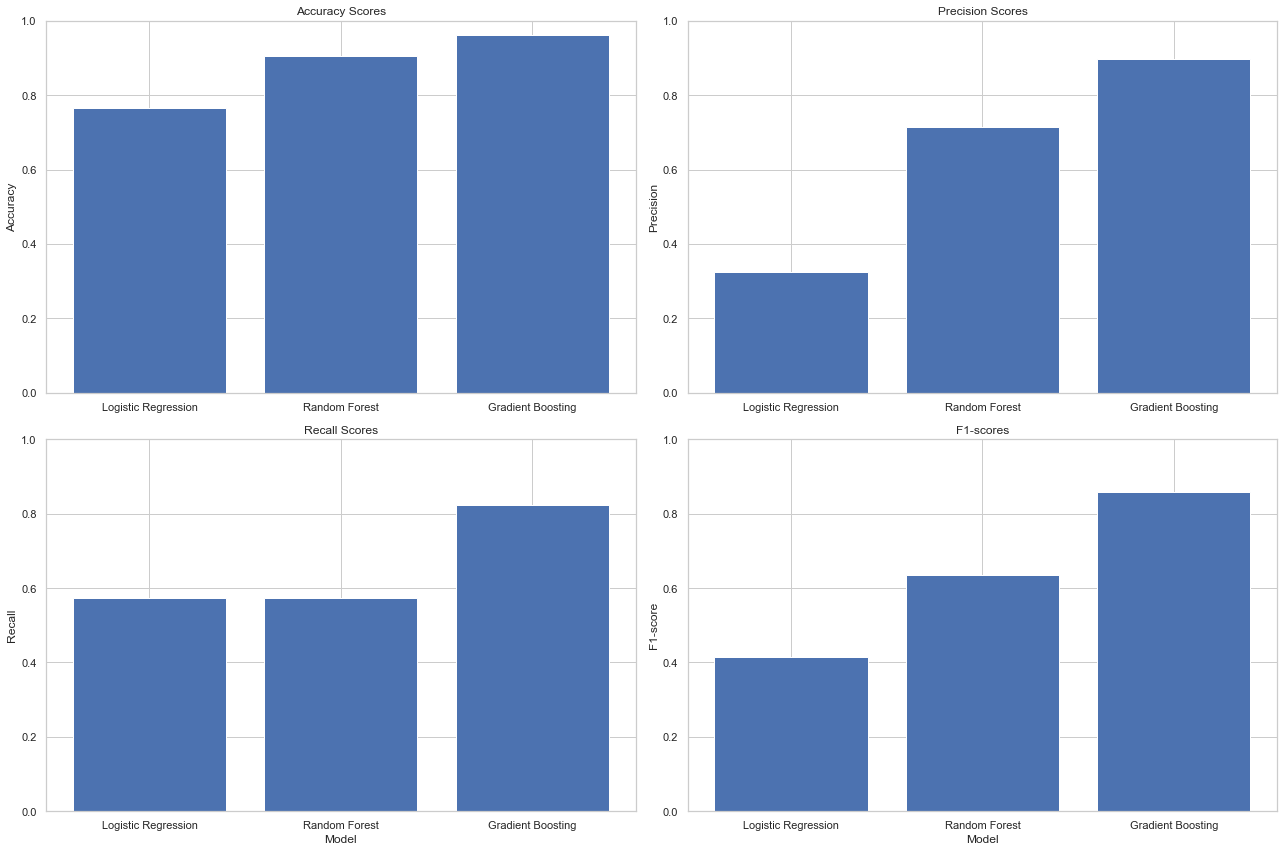

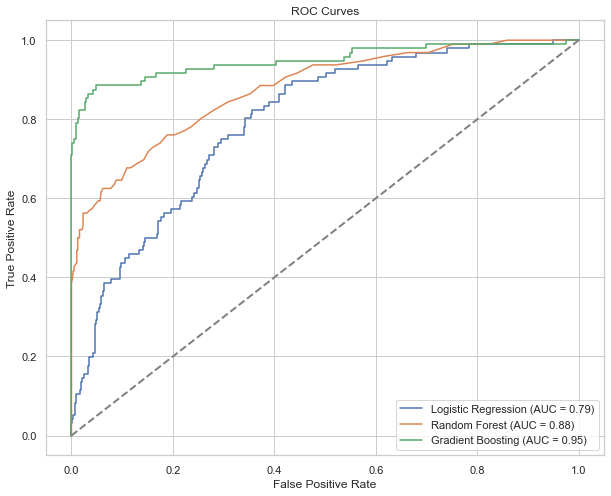

In [58]:
# Initialize dictionaries to store the evaluation metrics for each model
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Assuming "models" is a dictionary of your tuned models (Gradient Boosting, Random Forest, and Logistic Regression)
for model_name, model in models.items():
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store the evaluation metrics in the dictionaries
    accuracy_scores[model_name] = accuracy
    precision_scores[model_name] = precision
    recall_scores[model_name] = recall
    f1_scores[model_name] = f1

# Create subplots for the bar plots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Visualize the evaluation metrics using bar plots
axs[0, 0].bar(accuracy_scores.keys(), accuracy_scores.values())
axs[0, 0].set_ylim(0, 1.0)
axs[0, 0].set_title("Accuracy Scores")
axs[0, 0].set_ylabel("Accuracy")

axs[0, 1].bar(precision_scores.keys(), precision_scores.values())
axs[0, 1].set_ylim(0, 1.0)
axs[0, 1].set_title("Precision Scores")
axs[0, 1].set_ylabel("Precision")

axs[1, 0].bar(recall_scores.keys(), recall_scores.values())
axs[1, 0].set_ylim(0, 1.0)
axs[1, 0].set_title("Recall Scores")
axs[1, 0].set_xlabel("Model")
axs[1, 0].set_ylabel("Recall")

axs[1, 1].bar(f1_scores.keys(), f1_scores.values())
axs[1, 1].set_ylim(0, 1.0)
axs[1, 1].set_title("F1-scores")
axs[1, 1].set_xlabel("Model")
axs[1, 1].set_ylabel("F1-score")

plt.tight_layout()
plt.show()

# Create a new figure for the ROC curves
plt.figure(figsize=(10, 8))

# Create ROC curves for each model
for model_name, model in models.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot the diagonal line, which represents a random classifier
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

# Show the legend
plt.legend(loc='lower right')

# Display the plot
plt.show()


 **Logistic Regression:**  The model achieved an accuracy of 87.3% on the test data. It demonstrated a precision of 63.04%; indicating that around 63.04% of the instances predicted as positive were actually true positives. The recall score of 0.3021 suggests that the model identified approximately 30.21% of the actual positive instances. The F1-score of 0.4085 indicates a moderate balance between precision and recall.
 
**Random Forest:** The model achieved perfect scores of 1.0000 for accuracy, precision, recall, and F1-score on the training data. On the test data, it demonstrated high accuracy (0.9291) and precision (1.0000), indicating accurate predictions and true positive rates. However, the model had a lower recall of 0.5104, suggesting it missed a significant portion of positive instances. The F1-score of 0.6759 represents a reasonable balance between precision and recall on the test data.

**Gradient Boosting:** The gradient boost model achieved perfect scores of 1.0000 for accuracy, precision, recall, and F1-score on the training data, indicating flawless performance. On the test data, it maintained a high accuracy of 0.9713 and precision of 0.9873, suggesting accurate predictions and a high proportion of true positives. The recall score of 0.8125 indicates that the model successfully captured around 81.25% of the actual positive instances. The F1-score of 0.8914 represents a good balance between precision.

Overall, Gradient Boosting demonstrates the best performance among the three models, achieving high accuracy and balanced precision-recall trade-off on the test set.

#### Feature selection

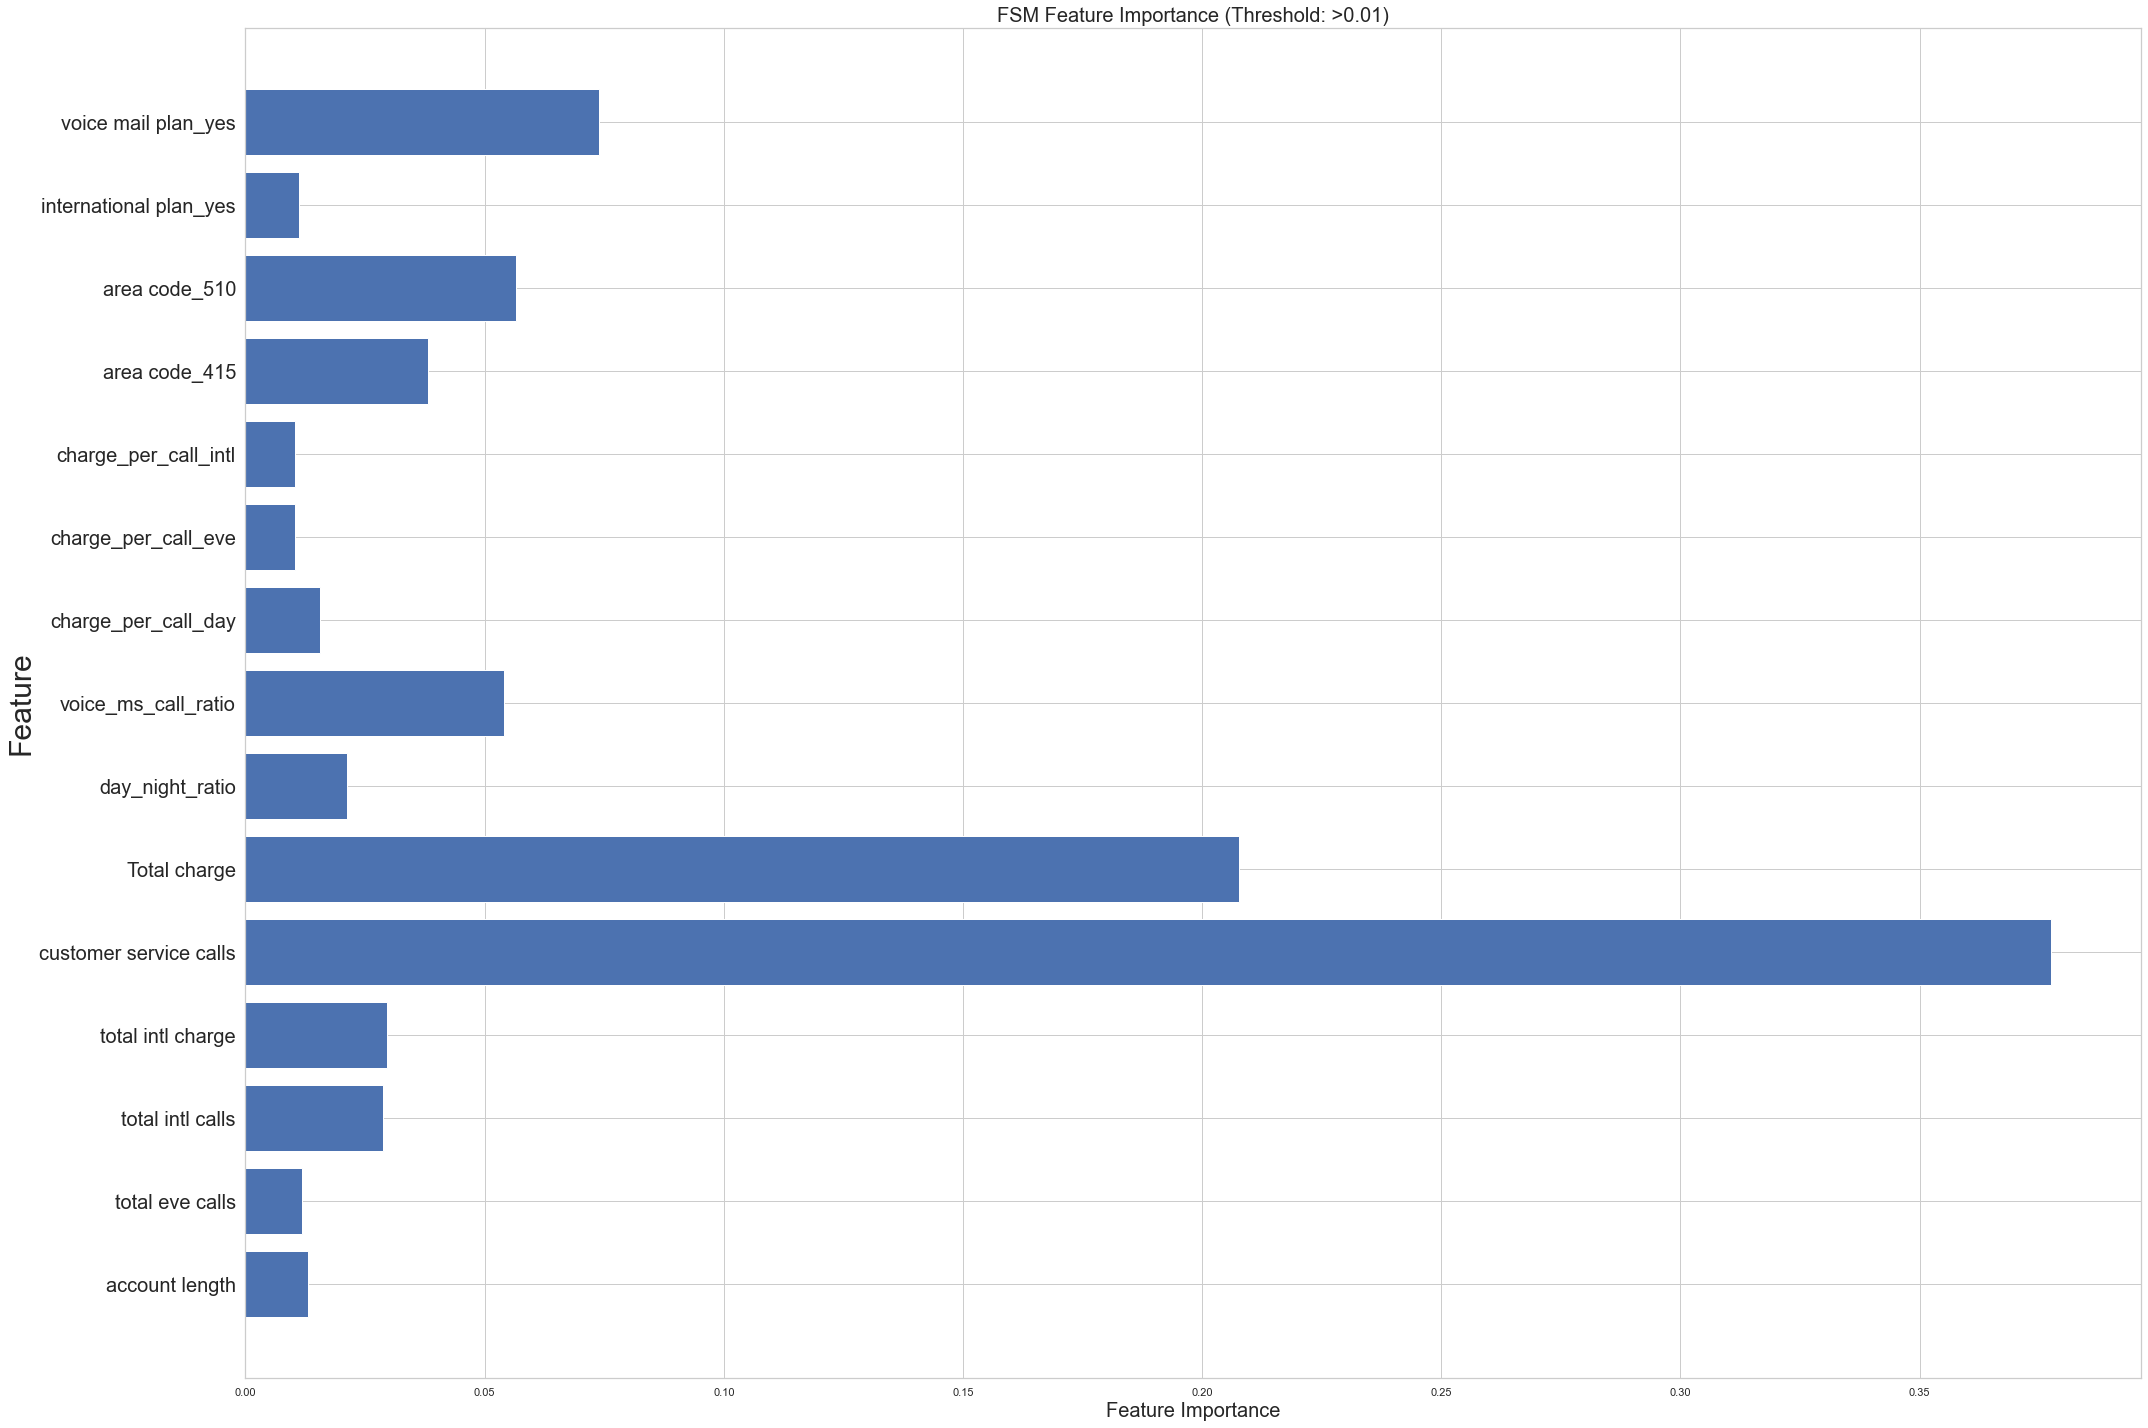

In [61]:
n_features = best_clf.n_features_
threshold = 0.01  # Set the threshold for including features with importance

# Filter the features based on the importance threshold
important_features = [feature for feature, importance in zip(X.columns, best_clf.feature_importances_) if importance > threshold]

# Create a subset of feature importances for the important features
importances_subset = [importance for importance in best_clf.feature_importances_ if importance > threshold]

plt.figure(figsize=(30, 20))
plt.barh(range(len(important_features)), importances_subset)
plt.yticks(range(len(important_features)), important_features, fontsize=20)
plt.xlabel('Feature Importance', fontsize=20)
plt.ylabel('Feature', fontsize=30)
plt.title('FSM Feature Importance (Threshold: >{})'.format(threshold), fontsize=20)
plt.tight_layout()
plt.show()

We can see from this feature importance graph that there are several features that the model is weighing more heavily:
- **Customer_service_calls**
- **Total_charge(Total amount spent by the customer)**
- **Voice mail plan**
- **International_plan**
- **Area Code**

### Conclusion

**Model Performance:**
- The churn prediction models seem to have reasonably good performance based on the metrics used (accuracy, precision, recall, and F1-score), with Gradient Boosting performing the best with an Accuracy of 96.07% and Recall of 82.2% after tuning.
- The model tuning for the Decision Tree model led to an improvement in accuracy and precision but a decrease in recall. This indicates a trade-off between correctly predicting positive instances and capturing all actual positive instances.

**Key Features:** 
- 'international_plan', 'total_charge', and 'customer_service_calls' emerged as the most influential features for predicting churn. This suggests that customers with an international plan, those who have a high total charge, and those who have made more customer service calls are more likely to churn.

### Recommendations

Based on our findings, we recommend the following:

- **Review International Plan:** Given its importance in predicting churn, it would be beneficial to review the structure and pricing of the international plan to ensure it meets customer needs.

- **Improve Customer Service:** The number of customer service calls is a strong predictor of churn. Efforts should be made to improve the customer service experience to reduce the likelihood of churn.

- **Analyze Pricing Structure:** Customers with a higher total charge are more likely to churn. A review of pricing strategies and structures could help to ensure they are competitive and provide value to customers.

### Future Work:
- **Deep Dive into Churn Reasons:** A more in-depth analysis of the reasons behind churn could be beneficial. This could involve surveys or interviews with customers who have churned to understand their reasons for leaving.

- **Predicting Churn Well in Advance:** It could be beneficial to not only predict which customers will churn but also when they will churn. This could allow Syriatel to intervene with retention strategies before it's too late.

- **Retention Strategy Implementation & Evaluation:** After identifying customers who are likely to churn, the next step would be to implement retention strategies and then evaluate their effectiveness. This could involve A/B testing or other methods to measure the impact of these strategies on customer retention.